<a href="https://colab.research.google.com/github/VicenteLigiero/POS_PUC/blob/main/MVP_PUC_ANLDBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP - PUC:** Análise de Dados e Boas Práticas.

Pós graduando: Vicente Ligiéro Neto

## Introdução

Para esse MVP, utilizei a base do kaggle que trata sobre Faltas em consultas médicas [clique aqui](https://www.kaggle.com/datasets/mohamedebrahimgaber/noshowappointmentskagglev2may2016).

Esse dataset trás informações da incidência de não comparecimento à consultas médicas.

A análise desse dataset tem como ojetivo identificar os motivos do não comparecimento e permitir a construção de estratégias para diminuir o não comparecimento as consultas.

In [32]:
pip install wikipedia

## Importação


In [33]:
# Importação das bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from IPython.display import Image
import xlrd
import gdown
import requests
from bs4 import BeautifulSoup
import csv
import cv2
from PIL import Image
import requests
from io import BytesIO
import wikipedia

### Dataset kaggle

In [34]:
# Importação do arquivo que contém as informações das consultas.
# ID do seu arquivo publico
file_id = "1qoyZVbqrcgyvHo5QJiDxTwuaicj6Tc5g"

# link google drive com o ID do arquivo
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregando o arquivo em um pandas dataFrame
df_kaggle = pd.read_csv(download_link)

### Datasets auxiliares
Esses Datasets, contém o cadastro dos estabelecimento de saúde do Brasil, [clique aqui](https://dados.gov.br/dados/conjuntos-dados/cnes-cadastro-nacional-de-estabelecimentos-de-saude), e dos municípios brasileiros, [clique aqui](https://www.ibge.gov.br/explica/codigos-dos-municipios.php), desse  dataset, gerei um consolidado com os estados brasileiros, [clique aqui](https://docs.google.com/spreadsheets/d/1F9UfCO1EpHzoC88h6QOYA6zu72Y8OqB4/edit?usp=drive_link),  utilizei eles para identificar o estado da unidade de saúde do dataset do kaggle.


In [35]:
# Importação do arquivo que contém o Cadastro Nacional das Unidades de Saúde
# ID do seu arquivo publico
file_id = "1HROzIxkNzLU593E-m5_JUPooS9VjxOPP"

# link google drive com o ID do arquivo
download_link = f"https://drive.google.com/uc?id={file_id}"
cnes = gdown.download(download_link,file_id,quiet=False)

# Carregando o arquivo em um pandas dataFrame
c = "/content/"
caminho = c + cnes
df_cnes = pd.read_csv(caminho, encoding = 'Windows 1252', sep=";")

Downloading...
From: https://drive.google.com/uc?id=1HROzIxkNzLU593E-m5_JUPooS9VjxOPP
To: /content/1HROzIxkNzLU593E-m5_JUPooS9VjxOPP
100%|██████████| 161M/161M [00:06<00:00, 26.3MB/s]


In [36]:
# Visualizando as primeiras linhas do Data Frame
df_cnes.head()

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
0,19,2602900000019,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR JAMACI DE MEDEIROS,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
1,27,2602900000027,26,260290,1.093045e+13,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,CASA DE SAUDE SANTA HELENA,NaN,NaN,M,...,NaN,2062.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
2,35,2602900000035,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,HOSPITAL MENDO SAMPAIO,NaN,NaN,M,...,NaN,1244.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
3,43,2602900000043,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR MANUEL GOMES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
4,51,2602900000051,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA VICENTE MENDES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM


In [37]:
# Importando o arquivo que contém todos os munícipios do rasil.
# ID do seu arquivo publico
file_id = "1WX-LDRo96frGvNvb27sS9t7PpuL4HZQP"

# link google drive com o ID do arquivo
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregando o arquivo em um pandas dataFrame
df_ibge = pd.read_csv(download_link, encoding='Windows-1252',delimiter = ';')

In [38]:
# Importando o arquivos que contém os Estados e Capitais do Brasil
# ID do seu arquivo publico
file_id = "1JrgPCDHoHAi2OSaTZy9PHge5hjEcbjUm"

# link google drive com o ID do arquivo
download_link = f"https://drive.google.com/uc?id={file_id}"

# Carregando o arquivo em um pandas dataFrame
df_uf = pd.read_csv(download_link, encoding='Windows-1252', delimiter =';')

### Informações sobre os datasets

In [39]:
# Visualização das primeiras linhas do DataFrame.
df_kaggle.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# Tamaho do DataFrame
df_kaggle.shape

(110527, 14)

In [41]:
# Verificando colunas e dados nulos
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [42]:
# Verificação de duplicidades
sum(df_kaggle.duplicated())

0

In [43]:
# Visualização das primeiras linhas do DataFrame.
df_ibge.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [44]:
# Verificando o tamanho do DataFrame.
df_ibge.shape

(5570, 13)

In [45]:
# Verificando colunas e dados nulos
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   UF                                    5570 non-null   int64 
 1   Nome_UF                               5570 non-null   object
 2   Região Geográfica Intermediária       5570 non-null   int64 
 3   Nome Região Geográfica Intermediária  5570 non-null   object
 4   Região Geográfica Imediata            5570 non-null   int64 
 5   Nome Região Geográfica Imediata       5570 non-null   object
 6   Mesorregião Geográfica                5570 non-null   int64 
 7   Nome_Mesorregião                      5570 non-null   object
 8   Microrregião Geográfica               5570 non-null   int64 
 9   Nome_Microrregião                     5570 non-null   object
 10  Município                             5570 non-null   int64 
 11  Código Município Completo     

In [46]:
# Verificando duplicidades
sum(df_ibge.duplicated())

0

In [47]:
# Visualização das primeiras linhas do DataFrame.
df_uf.head()

,UF,Código,Gentílico,Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matri?culas no ensino fundamental - matrículas [2021],IDH [2021],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2022],Total de veículos - veículos [2022]
0,Acre,12.0,acriano,GLADSON DE LIMA CAMELI,Rio Branco,"164173,429",830018.0,"5,06",153015.0,"0,71","6632883,108","6084416,806",1038.0,334377.0
1,Alagoas,27.0,alagoano,PAULO SURUAGY DO AMARAL DANTAS,Maceió,"27830,661",3127683.0,"112,38",458782.0,"0,684","11950438,46","10460634,92",935.0,1034187.0
2,Amapá,16.0,amapaense,CLÉCIO LUÍS VILHENA VIEIRA,Macapá,"142470,762",733759.0,"5,15",133839.0,"0,688","5396417,145","4224464,088",1177.0,232691.0
3,Amazonas,13.0,amazonense,WILSON MIRANDA LIMA,Manaus,"1559255,881",3941613.0,"2,53",702763.0,"0,7","17328459,43","15324896,56",965.0,1069794.0
4,Bahia,29.0,baiano,JERÔNIMO RODRIGUES SOUZA,Salvador,"564760,429",14141626.0,"25,04",1946957.0,"0,691","50191003,24",45570160,1010.0,4887673.0


In [48]:
# Verificando o tamanho do DataFrame.
df_uf.shape

(39, 14)

In [49]:
# Verificando colunas e dados nulos
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   UF                                                     37 non-null     object 
 1   Código                                                 27 non-null     float64
 2   Gentílico                                              27 non-null     object 
 3   Governador [2023]                                      27 non-null     object 
 4   Capital [2010]                                         27 non-null     object 
 5   Área Territorial - km² [2022]                          27 non-null     object 
 6   População residente - pessoas [2022]                   27 non-null     float64
 7   Densidade demográfica - hab/km² [2022]                 27 non-null     object 
 8   Matri?culas no ensino fundamental - matrículas [2021

In [50]:
# Verificando duplicidades
sum(df_uf.duplicated())

1

## Pré-processamento

### Tratamento

O data frame df_kaggle contém informações de presença e ausência as consultas, para a análise separei o data frame em dois, um com presenças e outro com ausencias.

Ausencias

In [51]:
# Alterando o nome da coluna
df_kaggle.rename(columns = {'No-show':'NoShow'}, inplace = True)
df_kaggle.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'NoShow'],
      dtype='object')

In [52]:
# Contagem de presenças e não presenças
df_kaggle.NoShow.value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [53]:
# Selecionando somente os registros = No-show
df_kaggle_ns = df_kaggle.query('NoShow == "Yes"')
print(df_kaggle_ns.NoShow.unique())
print(df_kaggle_ns.info())

['Yes']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       22319 non-null  float64
 1   AppointmentID   22319 non-null  int64  
 2   Gender          22319 non-null  object 
 3   ScheduledDay    22319 non-null  object 
 4   AppointmentDay  22319 non-null  object 
 5   Age             22319 non-null  int64  
 6   Neighbourhood   22319 non-null  object 
 7   Scholarship     22319 non-null  int64  
 8   Hipertension    22319 non-null  int64  
 9   Diabetes        22319 non-null  int64  
 10  Alcoholism      22319 non-null  int64  
 11  Handcap         22319 non-null  int64  
 12  SMS_received    22319 non-null  int64  
 13  NoShow          22319 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 2.6+ MB
None


In [54]:
df_kaggle_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [55]:
# Substituindo o índice
df_kaggle_ns = df_kaggle_ns.reset_index(drop=True)
df_kaggle_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
1,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
2,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
3,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
4,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [56]:
# Removendo colunas do DataFrame
df_kaggle_ns.drop(['NoShow'], axis = 1, inplace = True)
df_kaggle_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0
1,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0
2,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1
3,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0
4,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0


In [57]:
# Verificando o tamanho do Data Frame
df_kaggle_ns.shape

(22319, 13)

In [58]:
# Verificando a distribuição de não comparecimento nos municípios.
df_kaggle_ns.Neighbourhood.value_counts().head(20)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
ILHA DO PRÍNCIPE      532
ANDORINHAS            521
SÃO PEDRO             515
SANTO ANDRÉ           508
SANTA MARTHA          496
SANTO ANTÔNIO         484
ROMÃO                 474
GURIGICA              456
JABOUR                451
DA PENHA              429
Name: Neighbourhood, dtype: int64

O Data frame df_kaggle e derivados, informa o bairro onde ocorreu a consulta, porém sem identificar o Estado, será necessário complementar com outros dataset, para identificar a cidade, estado ou região do Brasil.

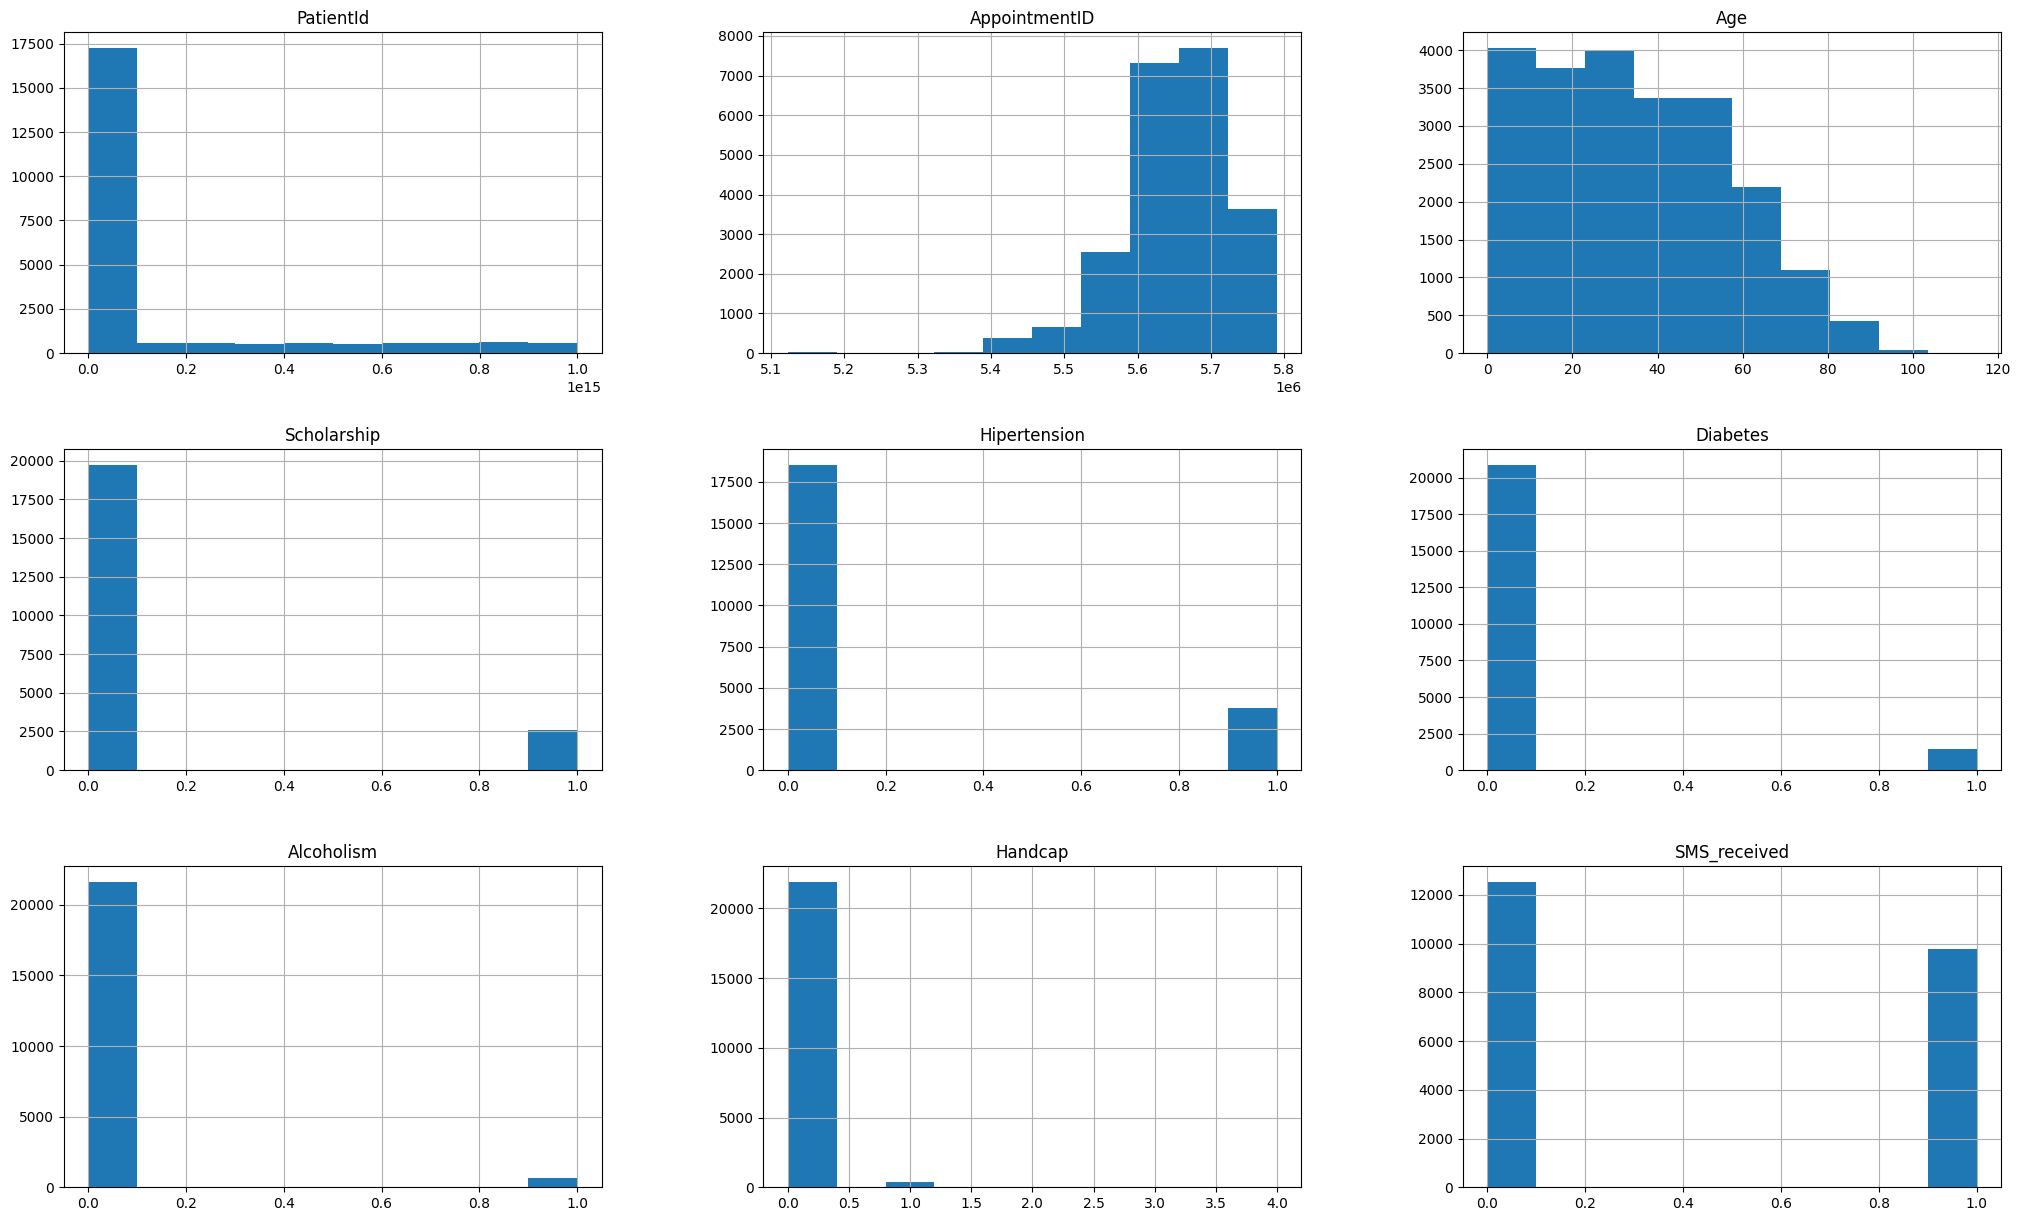

In [59]:
# Visualizando a distribuição e frequência das variáveis do data frame que contém as ausências
df_kaggle_ns.hist(figsize=(25,15));

Analisando as variáveis, a idade (Age) se destaca, com uma assimetria a direita, indicando maior incidência de não comparecimento numa faixa de idade de 0 a 40 anos.
A variável SMS (SMS_received) para análise em questão chama a atenção, uma vez que a quantidade de pessoas que recebram o SMS é próxima dos que não receberam, podendo ser útil para analisar a eficácia desse recurso.

Presença

In [60]:
# Selecionando somente os registros = Show - Presença
df_kaggle_s = df_kaggle.query('NoShow == "No"')
print(df_kaggle_s.NoShow.unique())
print(df_kaggle_s.info())

['No']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       88208 non-null  float64
 1   AppointmentID   88208 non-null  int64  
 2   Gender          88208 non-null  object 
 3   ScheduledDay    88208 non-null  object 
 4   AppointmentDay  88208 non-null  object 
 5   Age             88208 non-null  int64  
 6   Neighbourhood   88208 non-null  object 
 7   Scholarship     88208 non-null  int64  
 8   Hipertension    88208 non-null  int64  
 9   Diabetes        88208 non-null  int64  
 10  Alcoholism      88208 non-null  int64  
 11  Handcap         88208 non-null  int64  
 12  SMS_received    88208 non-null  int64  
 13  NoShow          88208 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.1+ MB
None


In [61]:
# Visualizando as primeias linhas do Data frame
df_kaggle_s.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [62]:
# Substituindo o índice
df_cnes_s = df_kaggle_s.reset_index(drop=True)
df_kaggle_s.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
# Removendo colunas do DataFrame
df_kaggle_s.drop(['NoShow'], axis = 1, inplace = True)
df_kaggle_s.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0


In [64]:
# Verificando o tamanho do data frame
df_kaggle_s.shape

(88208, 13)

In [65]:
# Verificando a distribuição de comparecimento nos municípios.
df_kaggle_s.Neighbourhood.value_counts().head(20)

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
CENTRO               2631
ITARARÉ              2591
TABUAZEIRO           2559
SANTO ANTÔNIO        2262
BONFIM               2223
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2063
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1933
NOVA PALESTINA       1862
DA PENHA             1788
ANDORINHAS           1741
ROMÃO                1741
ILHA DO PRÍNCIPE     1734
Name: Neighbourhood, dtype: int64

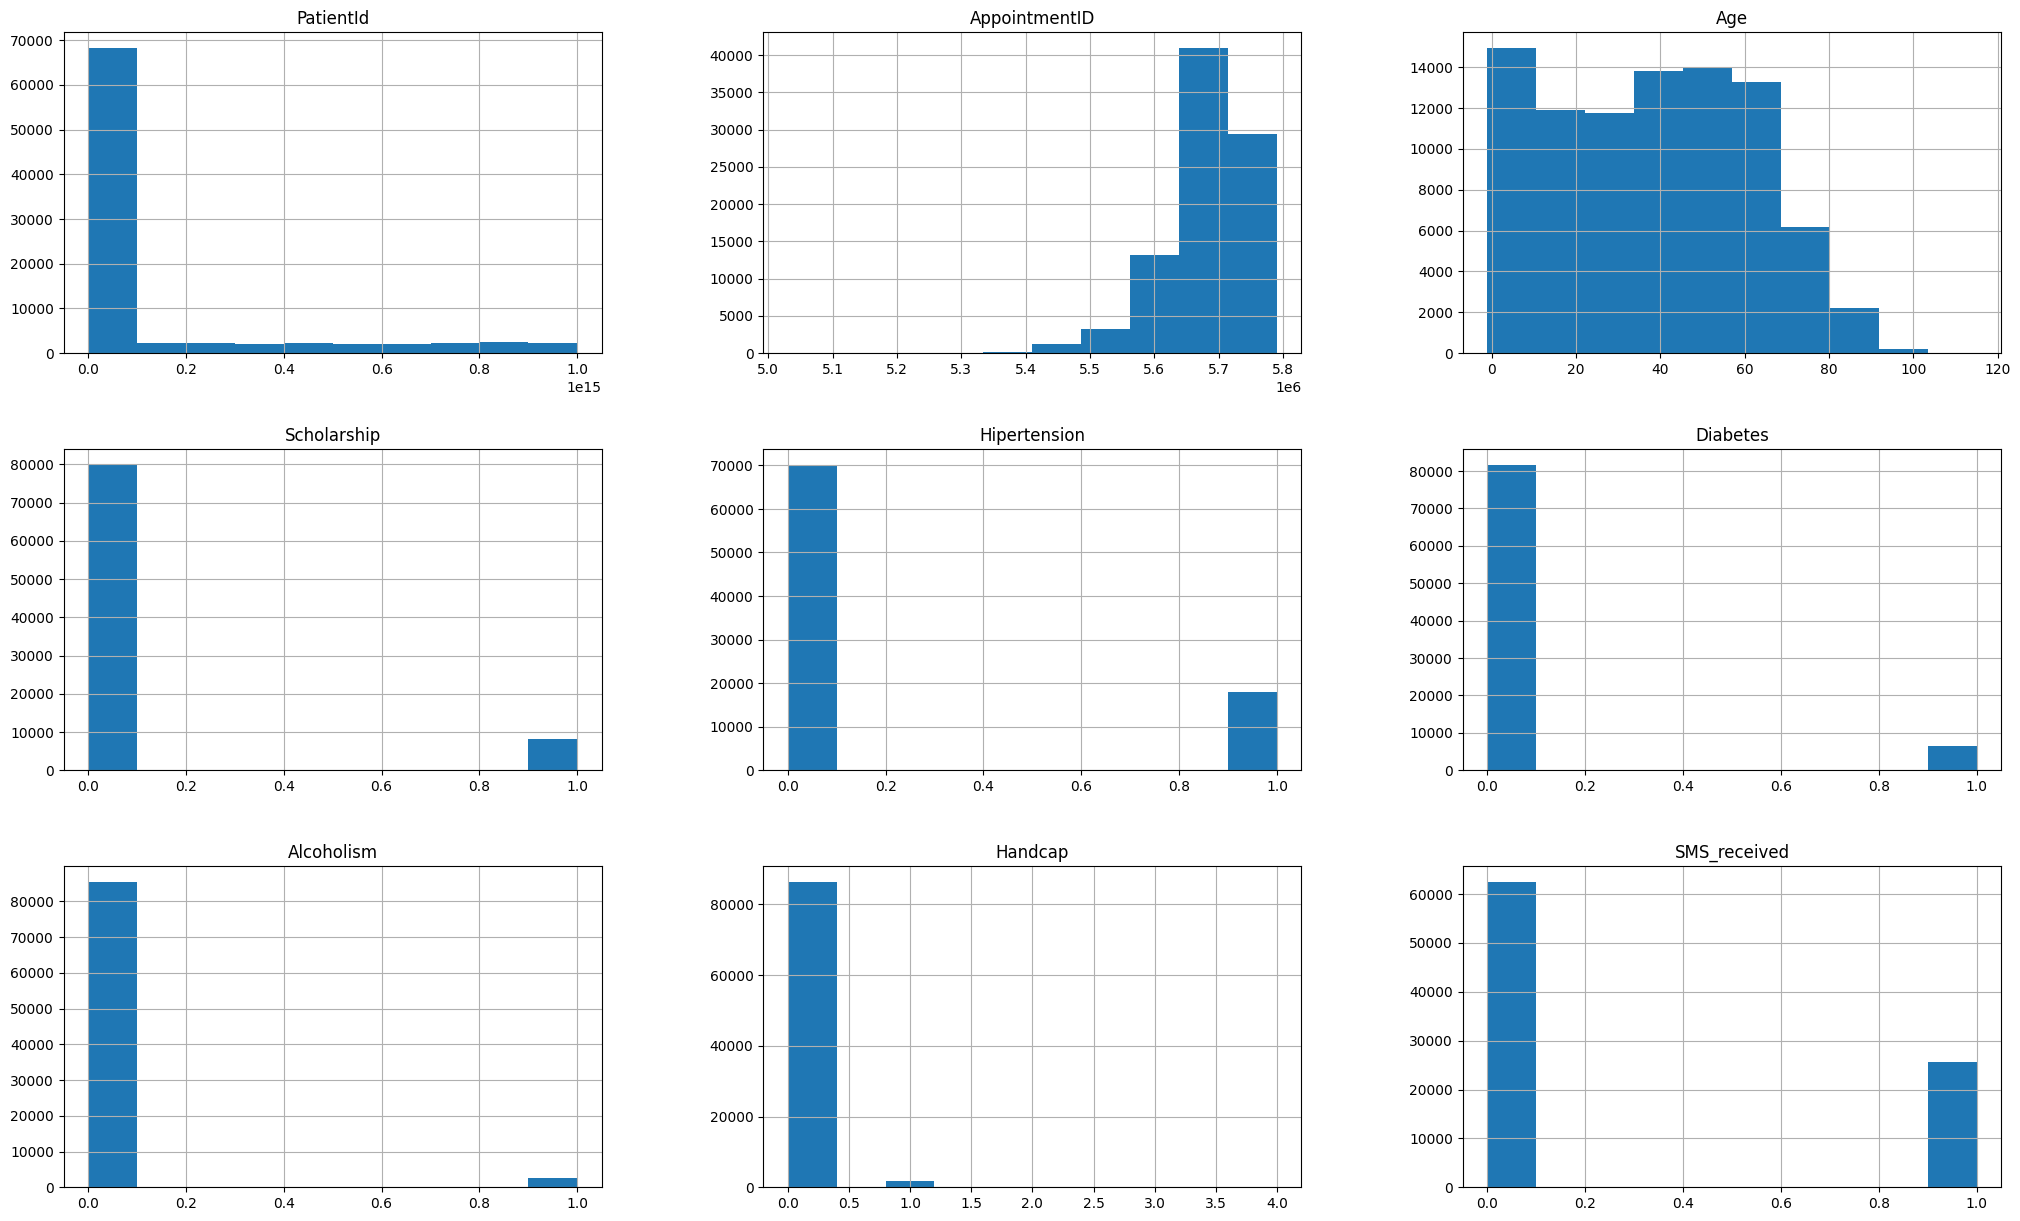

In [66]:
df_kaggle_s.hist(figsize=(25,15));

Analisando as variáveis, a idade (Age) se destaca, com uma assimetria a direita, indicando maior incidência de  comparecimento numa faixa de idade de 0 a 70 anos. A variável SMS (SMS_received) para análise em questão chama a atenção, uma vez que a quantidade de pessoas que não recebram o SMS é significativamente maior dos que não receberam, podendo ser útil para analisar a eficácia desse recurso.

###Limpeza

In [67]:
# Vendo oconteúdo do df que contém o cadastro das Unidades de Saúde - Fonte:IGE
df_cnes.head()

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
0,19,2602900000019,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR JAMACI DE MEDEIROS,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
1,27,2602900000027,26,260290,1.093045e+13,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,CASA DE SAUDE SANTA HELENA,NaN,NaN,M,...,NaN,2062.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
2,35,2602900000035,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,HOSPITAL MENDO SAMPAIO,NaN,NaN,M,...,NaN,1244.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
3,43,2602900000043,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR MANUEL GOMES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
4,51,2602900000051,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA VICENTE MENDES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM


In [68]:
# Informações do df
df_cnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504307 entries, 0 to 504306
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CO_CNES                   504307 non-null  int64  
 1   CO_UNIDADE                504307 non-null  object 
 2   CO_UF                     504307 non-null  int64  
 3   CO_IBGE                   504307 non-null  int64  
 4   NU_CNPJ_MANTENEDORA       110862 non-null  float64
 5   NO_RAZAO_SOCIAL           504305 non-null  object 
 6   NO_FANTASIA               504248 non-null  object 
 7   CO_NATUREZA_ORGANIZACAO   131 non-null     float64
 8   DS_NATUREZA_ORGANIZACAO   131 non-null     object 
 9   TP_GESTAO                 504307 non-null  object 
 10  CO_NIVEL_HIERARQUIA       130 non-null     float64
 11  DS_NIVEL_HIERARQUIA       130 non-null     object 
 12  CO_ESFERA_ADMINISTRATIVA  131 non-null     float64
 13  DS_ESFERA_ADMINISTRATIVA  131 non-null     o

Verificando como os campos NO_BAIRRO e Neighbourhood estão preenchidos nos datasets, uma vez que a forma das consultas com as unidades de saúde cadastradas são por esses campos.

In [69]:
# Lista o campo bairro no dataset de cadastro de unidade de saúde
df_cnes.query('NO_BAIRRO == ["REPUBLICA"]')

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
957,12122,3205300012122,32,320530,2.714206e+13,MUNICIPIO DE VITORIA,UNIDADE BASICA DE SAUDE BAIRRO REPUBLICA,NaN,NaN,M,...,usbrepublica@correio1.vitoria.es.gov.br,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
3669,48844,3550300048844,35,355030,NaN,PR OCUPACIONAL II MEDICINA E SEGURANCA DO TRAB...,PRO OCUPACIONAL REPUBLICA,NaN,NaN,M,...,CLARIANA@PROOCUPACIONAL.COM.BR,2305.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,NAO
22084,453110,3550300453110,35,355030,NaN,WELL CARE ASSISTENCIA A SAUDE LTDA,WELL CARE ASSISTENCIA A SAUDE,NaN,NaN,M,...,cassia@vitallcare.com.br,2062.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NAO
25741,507792,3550300507792,35,355030,NaN,MEDICAL CORP ASSESSORIA A SAUDE E BEM ESTAR LTDA,MEDICAL CORP ASSESSORIA A SAUDE E BEM ESTAR,NaN,NaN,M,...,renatooliveirapaschoal@gmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,NAO
27212,541281,3550300541281,35,355030,NaN,EMPREENDIMENTOS PAGUE MENOS S A,FARMACIAS PAGUE MENOS 227,NaN,NaN,M,...,EMP227@PMENOS.COM.BR,2046.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496499,9902368,3550309902368,35,355030,NaN,RCR CLINICA E CIRURGIA OFTALMOLOGICA EIRELI,RCR CLINICA OFTALMOLOGICA,NaN,NaN,M,...,AEDRA_REINE@YAHOO.COM.BR,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
499331,9937498,3550309937498,35,355030,NaN,RENAN CAUE ODONTO LTDA,RENAN CAUE ODONTO,NaN,NaN,M,...,drrenancaue@gmail.com,2062.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NAO
499334,9937536,3550309937536,35,355030,NaN,TELAVITA SERVICOS DE SAUDE LTDA,TELAVITA,NaN,NaN,M,...,contato@telavita.com.br,2062.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NAO
500190,9948058,3205309948058,32,320530,NaN,VALERIA DE SOUZA MENELI,VALERIA DE SOUZA MENELI,NaN,NaN,M,...,valmeneli@yahoo.com.br,4000.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO


In [70]:
# Lista o campo que informa o local onde ocorreu a consulta.
df_kaggle.query('Neighbourhood == ["REPÚBLICA"]')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
73,4.542132e+13,5552934,F,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,0,0,1,No
430,7.886632e+13,5632739,F,2016-04-28T08:23:20Z,2016-04-29T00:00:00Z,8,REPÚBLICA,0,0,0,0,0,0,No
433,7.757937e+14,5641261,M,2016-04-29T13:06:22Z,2016-04-29T00:00:00Z,4,REPÚBLICA,0,0,0,0,0,0,No
435,5.362892e+10,5641228,M,2016-04-29T12:59:17Z,2016-04-29T00:00:00Z,8,REPÚBLICA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110003,5.228457e+12,5747670,F,2016-05-30T16:08:03Z,2016-06-02T00:00:00Z,60,REPÚBLICA,0,0,1,0,0,0,No
110006,5.228457e+12,5770786,F,2016-06-03T10:57:01Z,2016-06-08T00:00:00Z,60,REPÚBLICA,0,0,1,0,0,0,No
110037,2.246259e+12,5748755,M,2016-05-31T07:15:45Z,2016-06-02T00:00:00Z,55,REPÚBLICA,0,1,0,0,0,0,No
110053,3.712224e+12,5775340,F,2016-06-06T09:18:10Z,2016-06-08T00:00:00Z,38,REPÚBLICA,0,0,0,0,0,0,No


Como podemos observar há acento no dataset onde ocorreram as consultas, porém no dataser de cadastro das unidades de saúde, não está acentuado, isso impact o resultado do relacionameto dos dataset por esses campos.

In [71]:
# Listando as ocorrências únicas do local onde das Unidades de Saúde onde ocorrem as consultas
df_kaggle.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Para fazer a busca entre os Datasets, com objetivo de obter as informações detalhados da localização das unidades de saúde, eliminei os caracteres acentuados.

In [72]:
# Normalizando a string para a forma NFD
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [73]:
# Retirando os acentos
strip_accents("REPÚBLICA")

'REPUBLICA'

In [74]:
# Criando uma lista com os nomes da localidade sem acento.
lst_neighbor_ref = []
for str in df_kaggle.Neighbourhood:
    lst_neighbor_ref.append(strip_accents(str))
df_kaggle['neighbour_ref'] = lst_neighbor_ref
df_kaggle.neighbour_ref.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPUBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SAO PEDRO', 'SANTA MARTHA', 'SAO CRISTOVAO', 'MARUIPE',
       'GRANDE VITORIA', 'SAO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRE', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTONIO HONORIO', 'RESISTENCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MARIO CYPRESTE', 'SANTO ANTONIO', 'BELA VISTA', 'PRAIA DO SUA',
       'SANTA HELENA', 'ITARARE', 'INHANGUETA', 'UNIVERSITARIO',
       'SAO JOSE', 'REDENCAO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOIRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLACAO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUIZA',
       'SANTA LUCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SAO 

In [75]:
# Retirando as ocorrências duplicadas
df_main = pd.DataFrame()
df_main['neighbour_ref']= lst_neighbor_ref
df_main.drop_duplicates(subset=['neighbour_ref'], keep='first', inplace=True)
print(df_main)

                     neighbour_ref
0                  JARDIM DA PENHA
2                    MATA DA PRAIA
3                PONTAL DE CAMBURI
5                        REPUBLICA
6                       GOIABEIRAS
...                            ...
1836                     FRADINHOS
1972                      NAZARETH
24987                    AEROPORTO
48754  ILHAS OCEANICAS DE TRINDADE
75199            PARQUE INDUSTRIAL

[81 rows x 1 columns]


In [76]:
# Lista o campo bairro no dataset de cadastro de unidade de saúde com base nos bairros do dataset que tem o registro de consultas
df_cnes_filtrado = df_cnes.query('NO_BAIRRO in ["JARDIM DA PENHA", "MATA DA PRAIA", "PONTAL DE CAMBURI", "REPUBLICA", "GOIABEIRAS", "ANDORINHAS", "CONQUISTA", "NOVA PALESTINA", "TABUAZEIRO", "SANTA MARTHA", "MARUIPE", "GRANDE VITORIA", "SAO BENEDITO", "ILHA DAS CAIEIRAS", "SOLON BORGES", "JARDIM CAMBURI", "MARIA ORTIZ", "JABOUR", "ANTONIO HONORIO", "RESISTENCIA", "ILHA DE SANTA MARIA", "JUCUTUQUARA", "MONTE BELO", "MARIO CYPRESTE", "PRAIA DO SUA", "SANTA HELENA", "ITARARE", "INHANGUETA", "UNIVERSITARIO", "REDENCAO", "PARQUE MOSCOSO", "CARATOIRA", "ARIOVALDO FAVALESSA", "ILHA DO FRADE", "GURIGICA", "JOANA D´ARC", "CONSOLACAO", "PRAIA DO CANTO", "MORADA DE CAMBURI", "BARRO VERMELHO", "ESTRELINHA", "FORTE SAO JOAO", "FONTE GRANDE", "ENSEADA DO SUA", "SANTOS REIS", "JESUS DE NAZARETH", "SANTA TEREZA", "CRUZAMENTO", "ILHA DO PRINCIPE", "ROMAO", "COMDUSA", "SANTA CECILIA", "VILA RUBIM", "DE LOURDES", "DO QUADRO", "DO CABRAL", "HORTO", "SEGURANCA DO LAR", "ILHA DO BOI", "FRADINHOS", "NAZARETH", "AEROPORTO", "ILHAS OCEANICAS DE TRINDADE"]')

In [77]:
# Vericando a quantidade de ocorrência dos bairros das consultas com base no código do estado (CO_UF)
df_cnes_filtrado.CO_UF.value_counts().head(20)

32    1389
35    1145
31     751
52     273
43     119
24      99
42      90
51      87
26      83
33      75
23      60
22      54
17      45
41      42
29      38
21      35
15      31
50      31
12      22
14      20
Name: CO_UF, dtype: int64

In [78]:
# Verificando qual o estado da maior ocorrência de consulta.
df_uf.query('Código == 32')

,UF,Código,Gentílico,Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matri?culas no ensino fundamental - matrículas [2021],IDH [2021],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2022],Total de veículos - veículos [2022]
7,Espírito Santo,32.0,capixaba ou espírito-santense,JOSÉ RENATO CASAGRANDE,Vitória,"46074,448",3833712.0,"83,21",503003.0,"0,771","19685616,74",14392338,1723.0,2248960.0


In [79]:
# Pesquisa dos bairros de Vitórioa do Espirito Santo no Wikipedia
# Fazer o request da página
url = 'https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Vit%C3%B3ria_(Esp%C3%ADrito_Santo)'
response = requests.get(url)

# Extrair a tabela HTML da página
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
# Extrair os dados da tabela e salvá-los em um arquivo CSV
with open('dados.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in table.find_next('th'):
          for row in table.find_all('tr'):
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            writer.writerow(cols)

In [80]:
# Importando o arquivo com os bairros de vitória para um data frame
df_es = pd.read_csv('/content/dados.csv')

In [81]:
# Visualizando o conteúdo do data frame que contém os bairros de Vitória
df_es.head(50)

,Vitória,I,Zona Sul (Centro),Centro • Do Moscoso • Fonte Grande • Ilha do Príncipe • Parque Moscoso • Piedade • Santa Clara • Vila Rubim,Unnamed: 4
0,II,Santo Antônio,Ariovaldo Favalessa • Bela Vista • Caratoíra •...,NaN,NaN
1,III,Jucutuquara,Bento Ferreira • Consolação • Cruzamento • De ...,NaN,NaN
2,IV,Maruípe,Andorinhas • Bonfim • Da Penha • Itararé • Joa...,NaN,NaN
3,V,Zona Leste (Praia do Canto),Barro Vermelho • Enseada do Suá • Ilha do Boi ...,NaN,NaN
4,VII,Zona Oeste (São Pedro),Comdusa • Conquista • Ilha das Caieiras • Nova...,NaN,NaN
5,Goiabeiras,VI,Zona Norte (Goiabeiras),Aeroporto • Antônio Honório • Goiabeiras • Jab...,NaN
6,VIII,Jardim Camburi,Jardim Camburi • Parque Industrial,NaN,NaN
7,IX,Jardim da Penha,Boa Vista • Jardim da Penha • Mata da Praia • ...,NaN,NaN


Observando os dados dos bairros com os das consultas, há uma correlação entre eles, todos os bairros pertencem a Vitória do Espirito Santo.

### Definição de Amostra

Com base na contagem das ocorrências e na comparação com os bairro de Vitória, concluí que o registro de consultas, refere se a cidade Vitória, capital do Estado Espírito Santo.
Com base nessa conclusão filtrei o dataset que contém o cadastro das unidade de saúde pelo códido 32 que se refere ao estado do Espírito Santo, isso foi necessário devido o tamanho desse dataset, o join que faço abaixo demorava horas rodando e muitas vezes a conexão com o cola era interronpida.

In [82]:
# Retirando os registros que geram erros
df_cnes_filtrado = df_cnes.query('CO_CNES not in (3236463,4343700,2564998,2712873,2715562,2244586,9059628,9885412,9885420,9414428,6973507,6017460,3169405,7414463,6457983,9091319,7370822,2823810,2548569,7750684,6821731,7988125,4215877,6790682,2746557,2520052,6074227,9944397,9543414,2174618,6434207,6784399,7548273,2797100,657395,2105926,7472676,2278960,5804809,5799430,2113392,5408113,9527249,3206319,7670451,5245818,3389359,9588035,7421419,916420,2326957,2207370,2207397,5156785,7876971,3186091,4154797,6069444,4195051,9539,1004395,9591621,1087355,2915979,554405,24805,7464193,5377250,6690157,4112504,3434893,6796958,416398,9381805,7154615,7082614,5297257)')

In [83]:
# Filtrando o dataset para trazer somente o estado do Espírito Santo e Bairros que não estejam vazios.
df_cnes_filtrado2 = df_cnes_filtrado.query ('NO_BAIRRO != "nan" & CO_UF ==32')
df_cnes_filtrado2.head()

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
18,213,3205300000213,32,320530,NaN,FISIO FITNESS CENTRO INTEGRADO DE SAUDE LTDA,FISIO FITNESS CENTRO INTEGRADO DE SAUDE LTDA,NaN,NaN,M,...,fisio.fitness@hotmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
42,523,3205300000523,32,320530,NaN,SINGULARI CLINICA DE SAUDE MULTIDISCIPLINAR LTDA,SINGULARI CLINICA DE SAUDE MULTIDISCIPLINAR LTDA,NaN,NaN,M,...,barbararesende54@gmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
72,949,3205300000949,32,320530,NaN,ORAL CONCEPT LTDA,ORAL CONCEPT,NaN,NaN,M,...,francinegamamartins@gmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
262,3573,3204900003573,32,320490,2.708061e+13,SECRETARIA DE ESTADO DA SAUDE,FARMACIA CIDADA DE SAO MATEUS,NaN,NaN,E,...,farmaciacidada.sm@saude.es.gov.br,1023.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
480,6378,3205300006378,32,320530,NaN,M F DE OLIVEIRA QUALI VIDA,QUALI VIDA,NaN,NaN,M,...,financeiro@clinicaqualivida.com,2135.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO


In [84]:
# Contando as ocorrências dos bairros de cadastro das unidades de saúde com os bairros onde ocorreram as consultas.
lst_count=[]
for index, strN1 in df_main.iterrows():
    count=0
    for index2, strN2 in df_cnes_filtrado2.iterrows():
      if strN2['NO_BAIRRO'] in strN1['neighbour_ref']:
          count+=1
    lst_count.append(count)
df_main['countneighbour_ref']=lst_count

Identificação dos bairros via contagem de ocorrência nos dataset.

Com base na analise realizada no arquivo gerado, bem com no dataset do das unidades de saúde e estados e munícipios, confirmei que as unidades de saúde estão vinculadas a Vitória do Estado do Espiríto Santo.


In [85]:
# Comparando os bairros do Cadastro das Unidade de Saúde com as Localidades das Consultas
lst_count2=[]
for strN1 in df_main.neighbour_ref:
    count=0
    for strN2 in df_cnes_filtrado2.NO_BAIRRO:
       if strN2.__contains__(strN1):
            count+=1
            Nome=strN2
            txt = count
    lst_count2.append([Nome])
    lst_count2.append([txt])
df_main3=pd.DataFrame(lst_count2, columns=['Nome'])
print(lst_count2)

[['JARDIM DA PENHA'], [126], ['MATA DA PRAIA'], [53], ['PONTAL DE CAMBURI'], [8], ['REPUBLICA'], [11], ['GOIABEIRAS'], [9], ['ANDORINHAS'], [3], ['CONQUISTA'], [1], ['CONQUISTA'], [1], ['JARDIM DA PENHA'], [136], ['TABUAZEIRO'], [5], ['BENTO FERREIRA'], [74], ['SAO PEDRO'], [36], ['SAO PEDRO'], [36], ['SAO CRISTOVAO'], [4], ['MARUIPE'], [9], ['GRANDE VITORIA'], [1], ['SAO BENEDITO'], [2], ['SAO BENEDITO'], [2], ['SANTO ANDREZINHO'], [12], ['SOLON BORGES'], [3], ['BONFIM'], [3], ['JARDIM CAMBURI'], [135], ['MARIA ORTIZ'], [8], ['JABOUR'], [3], ['ANTONIO HONORIO'], [1], ['RESISTENCIA'], [2], ['ILHA DE SANTA MARIA'], [8], ['JUCUTUQUARA'], [11], ['MONTE BELO'], [3], ['MARIO CYPRESTE'], [7], ['SANTO ANTONIO'], [45], ['BELA VISTA'], [19], ['PRAIA DO SUA'], [145], ['SANTA HELENA'], [46], ['ITARARE'], [9], ['ITARARE'], [9], ['ITARARE'], [9], ['SAO JOSE'], [20], ['SAO JOSE'], [20], ['SANTA CLARA'], [3], ['CENTRO'], [4070], ['PARQUE MOSCOSO'], [12], ['PARQUE MOSCOSO'], [12], ['SANTOS DUMONT'], [

In [86]:
# Imprimindo o conteúdo do dataset gerado.
print(df_main3)

                  Nome
0      JARDIM DA PENHA
1                  126
2        MATA DA PRAIA
3                   53
4    PONTAL DE CAMBURI
..                 ...
157                 11
158          AEROPORTO
159                 11
160  PARQUE INDUSTRIAL
161                  2

[162 rows x 1 columns]


In [87]:
# Associando os dataset, para identificar os bairros correlacionados.
df_ident_USM_Merge = df_main3.merge(df_cnes_filtrado2, left_on='Nome', right_on='NO_BAIRRO', how='left')
df_ident_USM_Merge.head()

,Nome,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
0,JARDIM DA PENHA,523.0,3205300000523,32.0,320530.0,NaN,SINGULARI CLINICA DE SAUDE MULTIDISCIPLINAR LTDA,SINGULARI CLINICA DE SAUDE MULTIDISCIPLINAR LTDA,NaN,NaN,...,barbararesende54@gmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
1,JARDIM DA PENHA,11878.0,3205300011878,32.0,320530.0,2.714206e+13,MUNICIPIO DE VITORIA,UNIDADE BASICA DE SAUDE JARDIM DA PENHA OTAVIA...,NaN,NaN,...,usjpenha@correio1.vitoria.es.gov.br,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
2,JARDIM DA PENHA,145009.0,3205300145009,32.0,320530.0,NaN,CONCEITUALLE SERVICOS MEDICOS E DERMATOLOGICOS...,CLINICA DR ALESSANDRA DE MELO,NaN,NaN,...,financeiro.draalessandramelo@gmail.com,2062.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NAO
3,JARDIM DA PENHA,286109.0,3205300286109,32.0,320530.0,NaN,CREMASCO MEDICINA DIAGNOSTICA LTDA,CREMASCO MEDICINA DIAGNOSTICA LTDA,NaN,NaN,...,regularizacao@medicinadiagnosticagroup.com.br,2062.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NAO
4,JARDIM DA PENHA,499013.0,3205300499013,32.0,320530.0,NaN,EMPREENDIMENTOS PAGUE MENOS S A,FARMACIAS PAGUE MENOS,NaN,NaN,...,emp.1134@pmenos.com.br,2046.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NAO


## Análise Exploratória

### Dataset completo

Análise das ocorrências de faltas, considerando o dataset df_kaggle_ns, que contém os não comparecimento as consultas.
O objetivo principal é identificar onde ocorre a maior incidência de não comparecimento e sugerir uma estratégi de ações que reduzam as faltas as consultas.

In [88]:
# Criando um dataset com base no dataset completo, contendo ausências e presenças, somente com as colunas a serem analisadas.
df_t = df_kaggle.loc[:,['Age','Gender','Scholarship','SMS_received','NoShow']]

In [89]:
# Alterando o valor das colunas para 0 e 1
df_t.loc[df_t['NoShow']=='Yes', 'NoShow'] = 1
df_t.loc[df_t['NoShow']=='No', 'NoShow'] = 0
df_t.loc[df_t['Gender']=='M', 'Gender'] = 1
df_t.loc[df_t['Gender']=='F', 'Gender'] = 0

In [90]:
# Convertando as colunas para int
df_t['Gender']=df_t['Gender'].astype(int)
df_t['NoShow']=df_t['NoShow'].astype(int)

In [91]:
# Verificando o novo data frame
print(df_t)

        Age  Gender  Scholarship  SMS_received  NoShow
0        62       0            0             0       0
1        56       1            0             0       0
2        62       0            0             0       0
3         8       0            0             0       0
4        56       0            0             0       0
...     ...     ...          ...           ...     ...
110522   56       0            0             1       0
110523   51       0            0             1       0
110524   21       0            0             1       0
110525   38       0            0             1       0
110526   54       0            0             1       0

[110527 rows x 5 columns]


In [92]:
# Analisando a correlação das variáveis
cor = df_t.corr()

In [93]:
print(cor)

                   Age    Gender  Scholarship  SMS_received    NoShow
Age           1.000000 -0.106440    -0.092457      0.012643 -0.060319
Gender       -0.106440  1.000000    -0.114293     -0.046298 -0.004119
Scholarship  -0.092457 -0.114293     1.000000      0.001194  0.029135
SMS_received  0.012643 -0.046298     0.001194      1.000000  0.126431
NoShow       -0.060319 -0.004119     0.029135      0.126431  1.000000


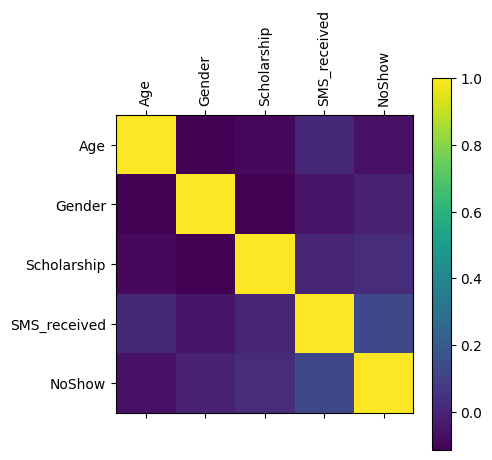

In [94]:
# Gráfico de calor
plt.matshow(cor)
plt.xticks(range(len(cor.columns)), cor.columns, rotation=90)
plt.yticks(range(len(cor.columns)), cor.columns)

plt.colorbar()
plt.show()

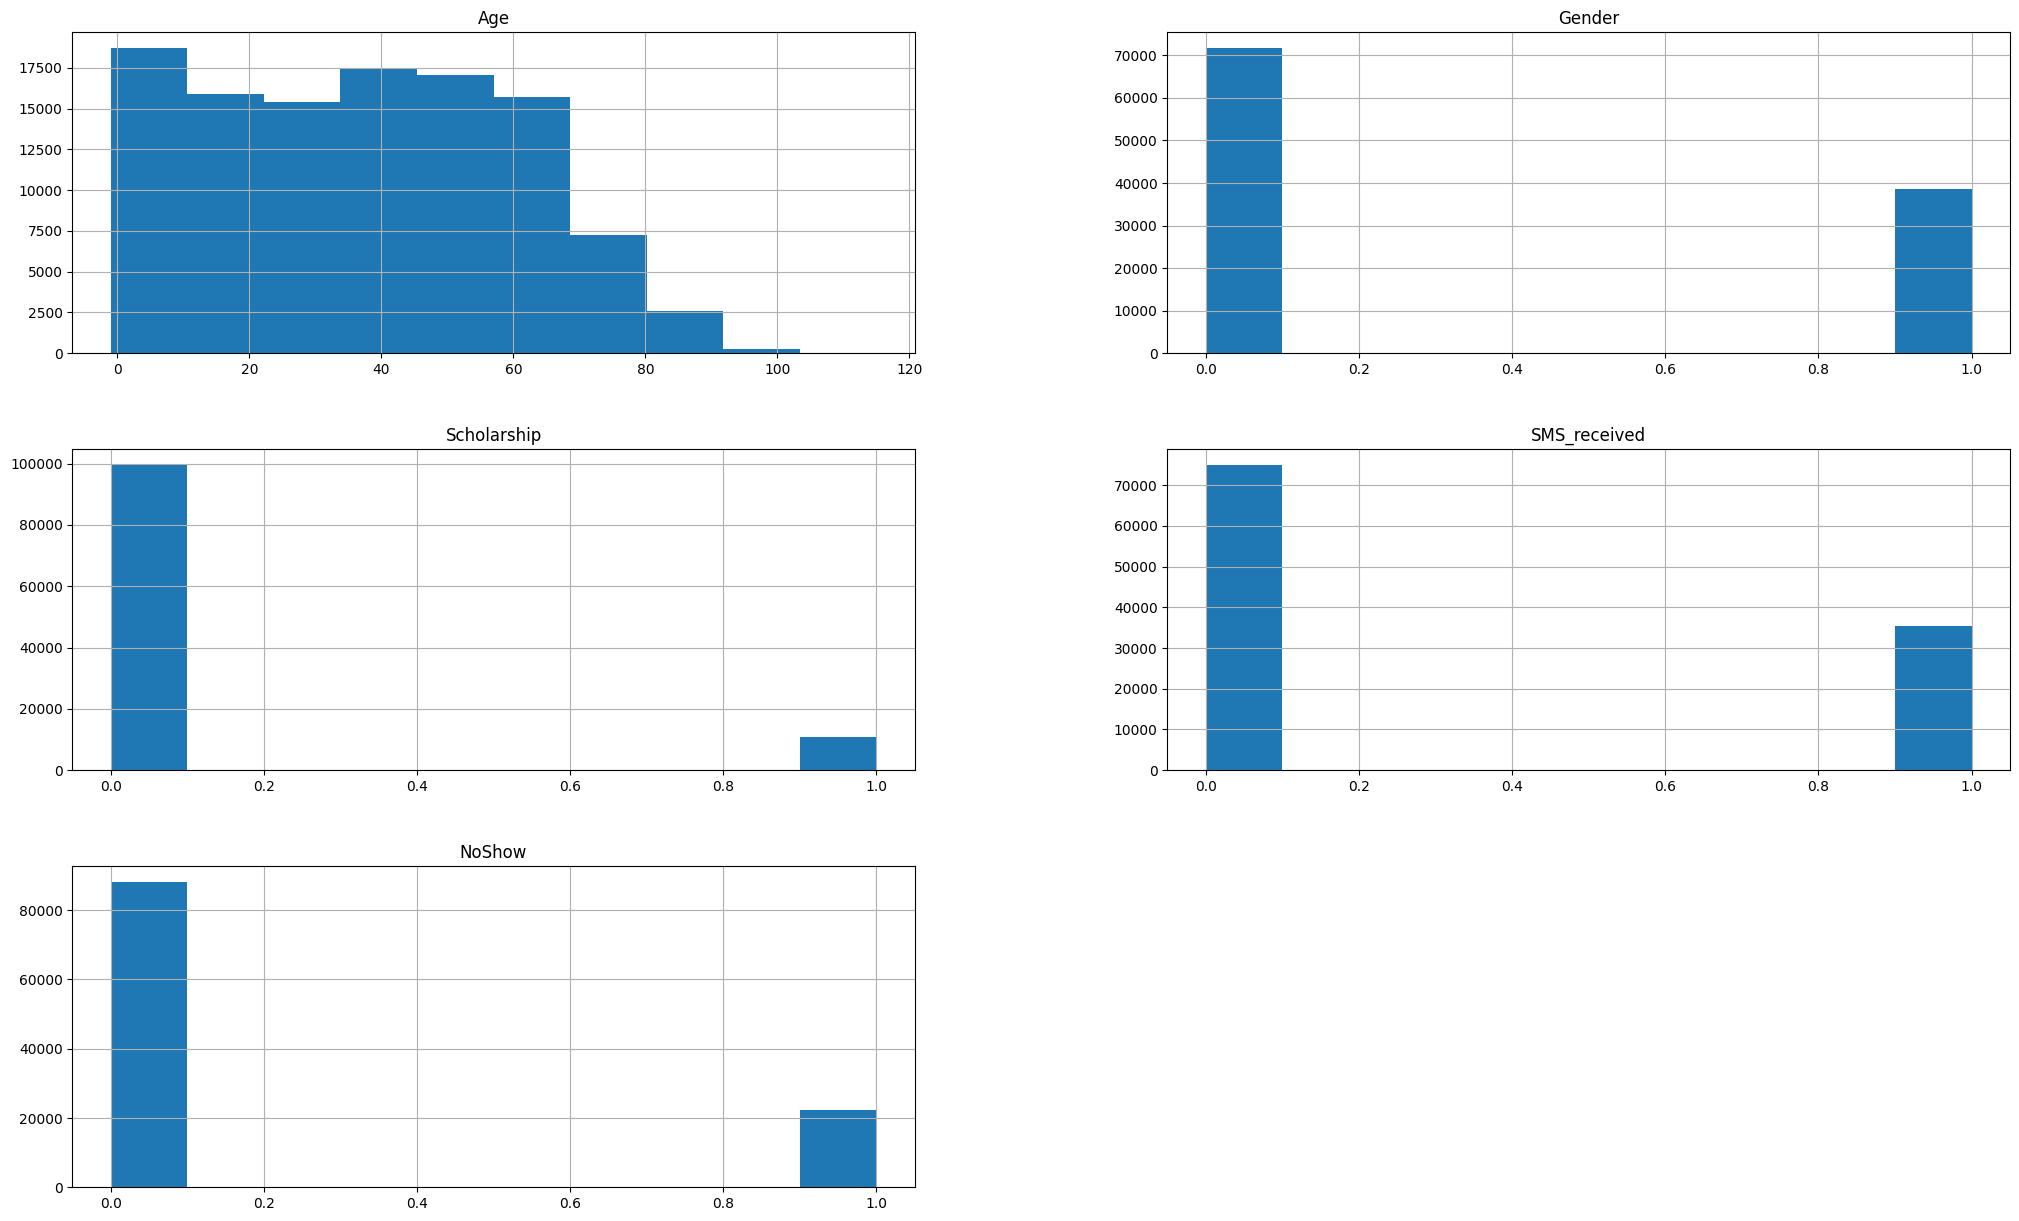

In [95]:
# Identificando padrões nos dados
df_t.hist(figsize=(25,15));

In [96]:
# Analisando a correlação das variavéis
correl = df_kaggle_ns.corr()

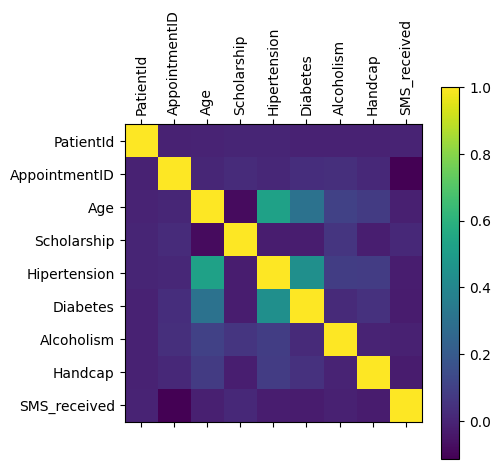

In [97]:
# Gráfico de calor
plt.matshow(correl)
plt.xticks(range(len(correl.columns)), correl.columns, rotation=90)
plt.yticks(range(len(correl.columns)), correl.columns)

plt.colorbar()
plt.show()

In [98]:
print(cor)

                   Age    Gender  Scholarship  SMS_received    NoShow
Age           1.000000 -0.106440    -0.092457      0.012643 -0.060319
Gender       -0.106440  1.000000    -0.114293     -0.046298 -0.004119
Scholarship  -0.092457 -0.114293     1.000000      0.001194  0.029135
SMS_received  0.012643 -0.046298     0.001194      1.000000  0.126431
NoShow       -0.060319 -0.004119     0.029135      0.126431  1.000000


Analisando o dataset completo com as presenças e ausências, observamos que há as seguintes correlações:

**Negativas:**

Entre Idade (Age) e não comparecimento, indicando que as pessoas mais idosas, comparecem menos as consultas.

**Positivas:**

Entre escolaridade (Scholarship) e não comparecimento, indicando que as pessoas com menor escolaridade comparecem ligeriramente mais as consultas.

Entre SMS (SMS_received) e não comparecimento é ligeirmente positivo, indicando uma ligeira tendência ao comparecimento a consulta.


### Dataset Não comparecimento

###Análise por sexo

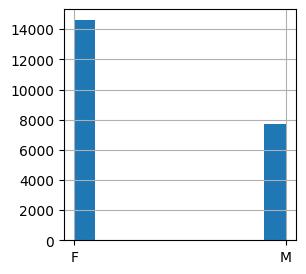

In [99]:
# Correlação de não comprecimento entre os sexo no dataset que contém somente os não comparecimentos
df_kaggle_ns.Gender.hist(figsize=(3,3));


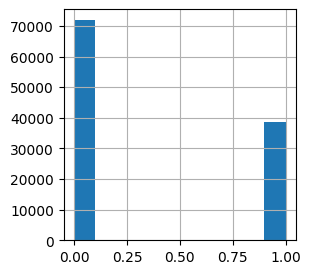

In [100]:
# Correlação de não comprecimento entre os sexo do dataset completo
df_t.Gender.hist(figsize=(3,3));

In [163]:
# Contando a quantidade de faltas por sexo
df_kaggle_ns.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [164]:
# Calculando a porcentagem de faltas do sexo feminino
(14594*100)/22319

65.38823423988529

In [162]:
# Calculando a porcentagem de faltas do sexo masculino
(7725*100)/22319

34.6117657601147

O comportamente em ambos os gráficos é igual, indicando o sexo (Gender) feminino como o maior não comparecimento as consultas, isso será analisado mais detalhadamente.

In [101]:
# Vizualizando o dataset
df_kaggle_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0
1,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0
2,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1
3,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0
4,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0


### Análise por Idade

In [102]:
# Verficando as idades para categorizar
df_kaggle_ns.Age.unique()

array([ 23,  39,  29,  40,  30,   4,  13,  12,  78,  58,  27,  19,   2,
        28,  67,  11,   0,  26,  18,  31,  34,  22,  33,  17,  41,  38,
        42,  35,  24,   3,  62,  36,  57,   8,  45,  51,  43,   7,   1,
        25,  60,  66,  20,  32,   9,  53,  21,  37,  54,  48,  73,  69,
         6,  10,  68,  55,   5,  64,  44,  80,  77,  98,  75,  82,  81,
        49,  46,  59,  56,  85,  14,  15,  65,  72,  16,  74,  47,  50,
        71,  63,  61,  52,  90,  83,  92,  70,  76,  87,  86,  91,  79,
        84,  89,  88,  93,  94,  95, 115,  96,  97])

In [103]:
# Identificando  maior idade
df_kaggle_ns.Age.max()

115

In [104]:
# Identificando  menor idade
df_kaggle_ns.Age.min()

0

In [105]:
# Identificando a média de idade
df_kaggle_ns.Age.mean()

34.31766656212196

In [106]:
# Identificando a mediana da idade
df_kaggle_ns.Age.median()

33.0

In [107]:
# Vizualiando a estatistica básica do dataset
df_kaggle_ns.Age.describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [108]:
# Categorizando a idade por faixa de 20 anos e contando as as ocorrências por faixa.
bin_edges=[-1,19,39,59,79,99,115]
bin_names=['00-19','20-39','40-59','60-79','80-99','100-115']
df_kaggle_ns['Faixa_Idade']=pd.cut(df_kaggle_ns.Age, bin_edges, labels=bin_names)
df_kaggle_ns.Faixa_Idade.value_counts()

00-19      6741
20-39      6680
40-59      5656
60-79      2692
80-99       547
100-115       3
Name: Faixa_Idade, dtype: int64

In [109]:
# Categorizando a idade por faixa de 20 anos até 59 anos e maior que 59 em um único grupo e contando as as ocorrências por faixa.
bin_edges=[-1,19,39,59,115]
bin_names=['00-19','20-39','40-59','60-115']
df_kaggle_ns['Q_Faixa_Idade']=pd.cut(df_kaggle_ns.Age, bin_edges, labels=bin_names)
df_kaggle_ns.Q_Faixa_Idade.value_counts()

00-19     6741
20-39     6680
40-59     5656
60-115    3242
Name: Q_Faixa_Idade, dtype: int64

In [110]:
# Categorizando a idade por faixa de 25 anos e contando as as ocorrências por faixa.
bin_edges=[-1,25,50,75,100,125]
bin_names=['00-25','26-50','51-75','76-100','101-125']
df_kaggle_ns['Faixa_Idade_25']=pd.cut(df_kaggle_ns.Age, bin_edges, labels=bin_names)
df_kaggle_ns.Faixa_Idade_25.value_counts()

00-25      8818
26-50      7774
51-75      4857
76-100      867
101-125       3
Name: Faixa_Idade_25, dtype: int64

In [111]:
df_kaggle_ns[['Age','Faixa_Idade','Faixa_Idade_25','Q_Faixa_Idade']].head(10)

,Age,Faixa_Idade,Faixa_Idade_25,Q_Faixa_Idade
0,23,20-39,00-25,20-39
1,39,20-39,26-50,20-39
2,29,20-39,26-50,20-39
3,40,40-59,26-50,40-59
4,30,20-39,26-50,20-39
5,4,00-19,00-25,00-19
6,13,00-19,00-25,00-19
7,12,00-19,00-25,00-19
8,78,60-79,76-100,60-115
9,58,40-59,51-75,40-59


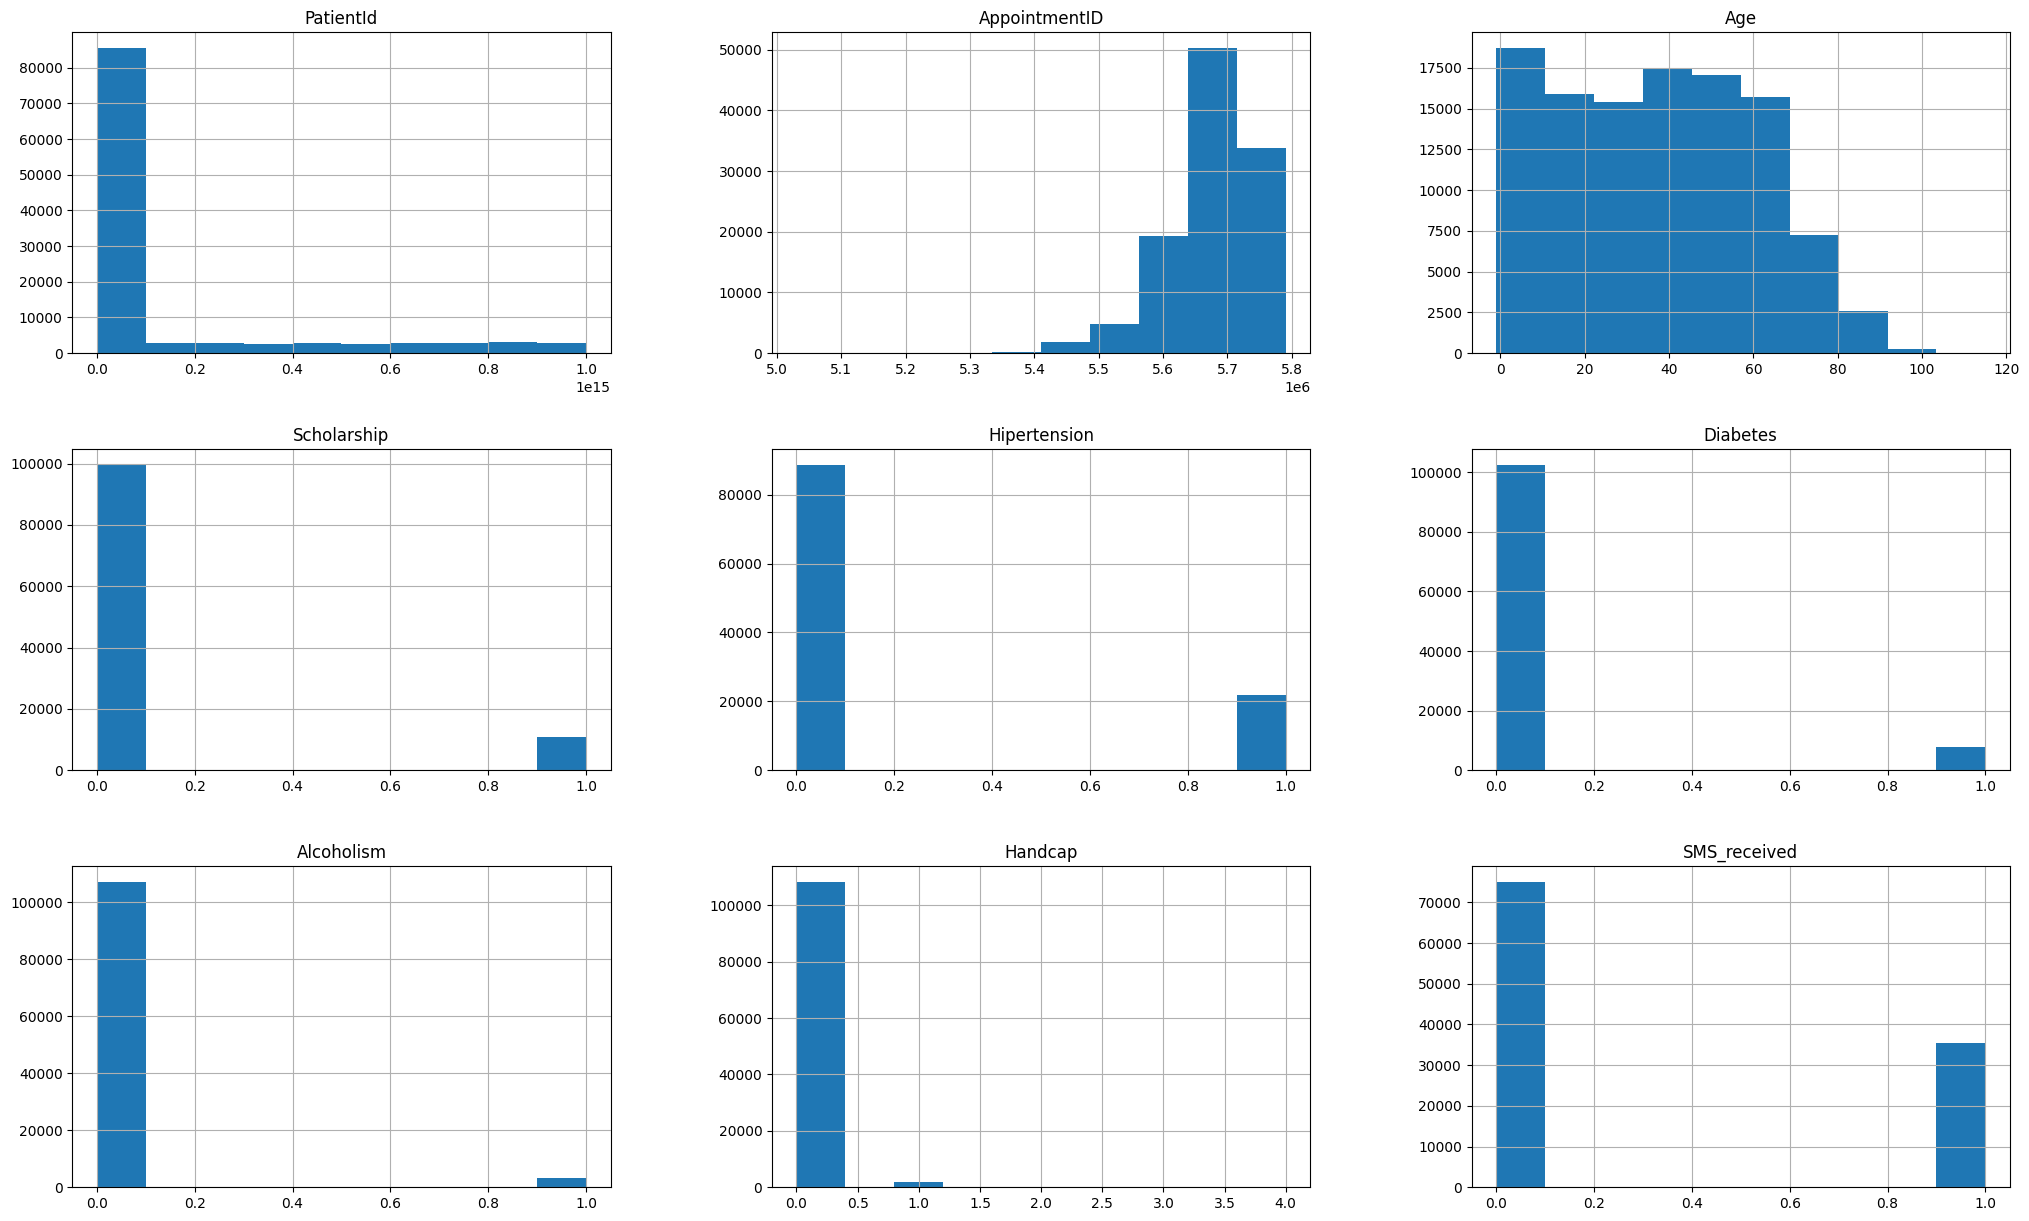

In [112]:
# Identificando padrões nos dados
df_kaggle.hist(figsize=(25,15));

Com base nos histogramas, a idade deve ser analisada cuidadosamente, devido a sua correlação com o não comparecimento a consulta.

Verificamos que doenças ou restrições físicas, tem baixa correlação e não influenciam ao não comparecimento as consultas.

Observando os pacientes sem limitações, podemos identificar que a probabilidade do não comparacimento é maior do que os com limitações.

O receimento de SMS lembrando da consulta, não alteram os resultados, pois o número de pacientes que receberam é relativamente próximo aos que não receberam.

Quem recebe bolsa de estudos (Scholarship) tem incidência de não comparecimento em alta,isso pode estar ligado a faixa etária menor, que depende do responsável para comparecer a consulta.

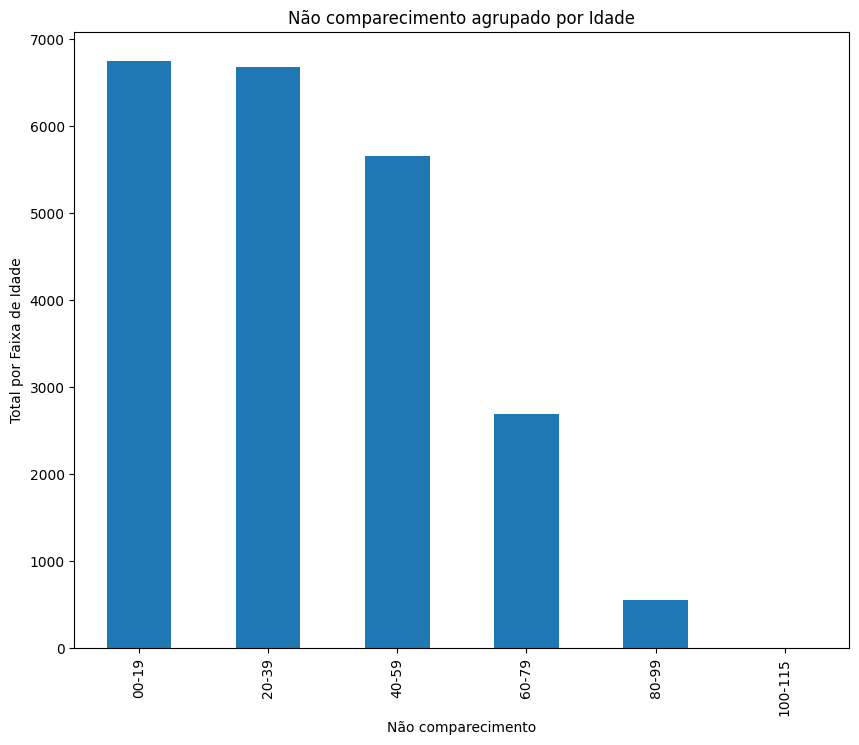

In [113]:
# Visualizando graficamente a distribuição por faixa de idade
df_kaggle_ns.Faixa_Idade.value_counts().reindex().plot(kind='bar', figsize=(10,8))
plt.title("Não comparecimento agrupado por Idade")
plt.xlabel("Não comparecimento")
plt.ylabel("Total por Faixa de Idade");

In [114]:
# Porcentagem de não comparecimento para pessoas menores que 39 anos
df_kaggle_ns.query('Age <39').Age.count()/df_kaggle_ns.Age.count()*100

58.60925668712756

In [115]:
# Porcentagem de não coparecimento para pessoas menores que 19 anos
df_kaggle_ns.query('Age <19').Age.count()/df_kaggle_ns.Age.count()*100

28.437654016757026

In [116]:
# Porcentagem de não comparecimento para pessoas entre 20 e 39 anos
df_kaggle_ns.query('Age >= 20 & Age <=39' ).Age.count()/df_kaggle_ns.Age.count()*100

29.92965634661051

Observando o gráfico acima, quase 60 % dos não comparecimento ocorreram na faixa de idade menor de 39 anos, estando incluso nessa faixa, pessoas menor de idade que depende de seus responsáveis para comparecerem as consultas, essa faixa contribuiu com 28,4% das faltas, enquanto que a faixa de 20-39 anos contribuiram com 29,9% das faltas, uma observação importante quanto a essa faixa é que ela compõe de forma massiva a classe tralhadora e ou de estudante.

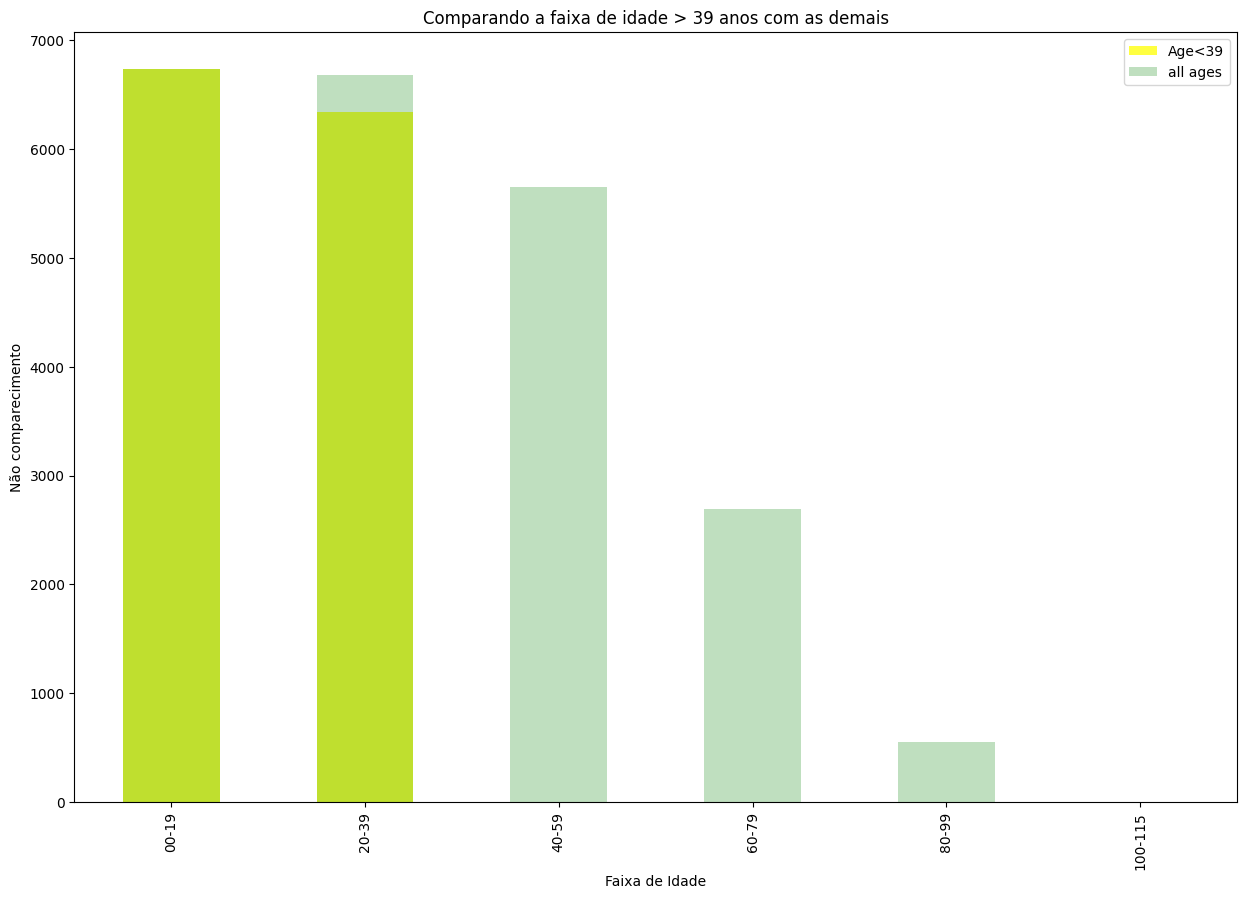

In [117]:
# Comprando o não comparecimento de pessoas menores de 39 anos nas faixas de idade.
df_kaggle_ns.query('Age < 39').Faixa_Idade.value_counts().reindex().plot(kind='bar', color='yellow', alpha=0.75, label='Age<39', figsize=(10,10))
df_kaggle_ns.Faixa_Idade.value_counts().reindex().plot(kind='bar', color='green', alpha=0.25, label='all ages', figsize=(15,10))
plt.legend()
plt.title("Comparando a faixa de idade > 39 anos com as demais")
plt.xlabel("Faixa de Idade")
plt.ylabel("Não comparecimento");

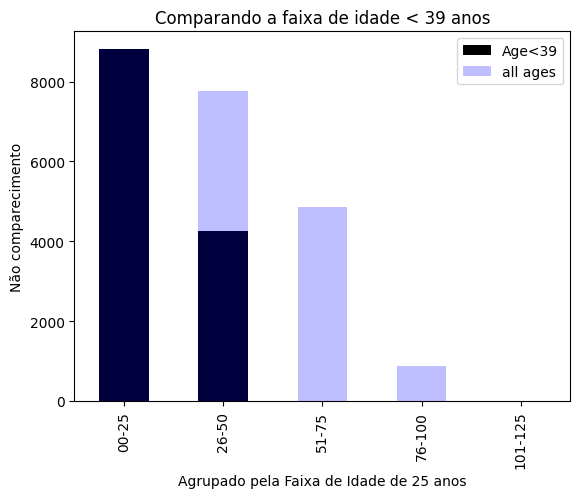

In [118]:
# Comprando o não comparecimento de pessoas menores de 39 anos com a distriuição de faixa de idade em 25 anos
df_kaggle_ns.query('Age<39').Faixa_Idade_25.value_counts().plot(kind='bar', color='black', alpha=1, label='Age<39')
df_kaggle_ns.Faixa_Idade_25.value_counts().plot(kind='bar', color='blue', alpha=0.25, label='all ages')
plt.legend()
plt.title("Comparando a faixa de idade < 39 anos")
plt.xlabel("Agrupado pela Faixa de Idade de 25 anos")
plt.ylabel("Não comparecimento");

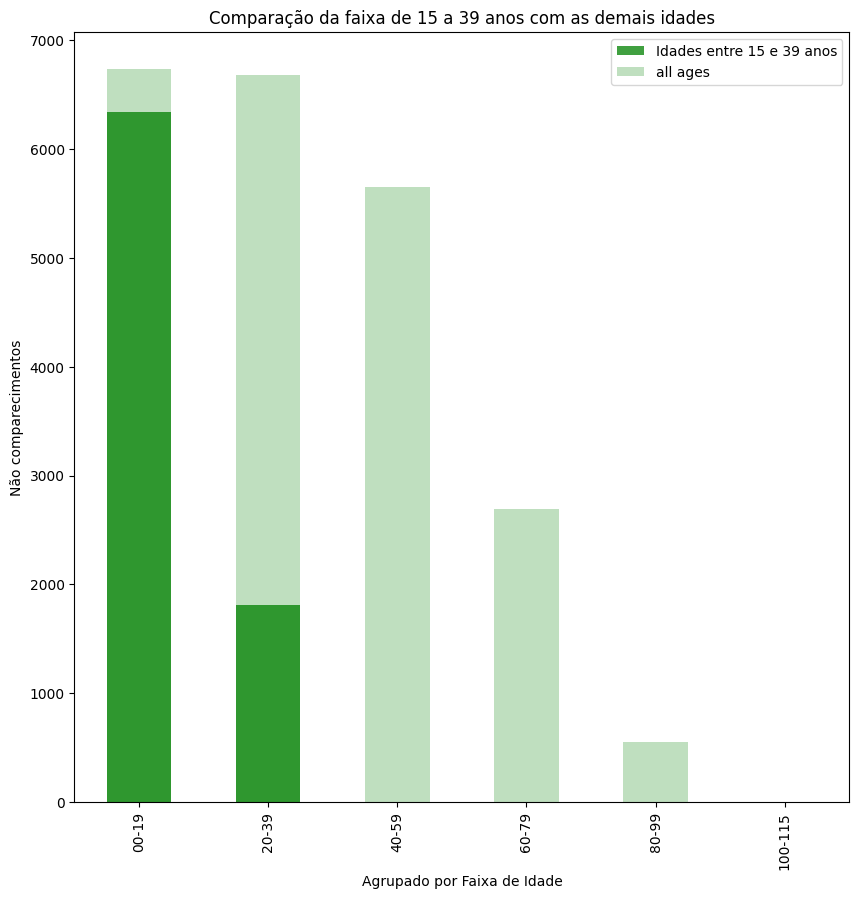

In [119]:
# Comprando o não comparecimento de pessoas entre 15 e 39 anos com as demais faixa de idade
df_kaggle_ns.query('Age<39 and Age>=15').Faixa_Idade.value_counts().reindex().plot(kind='bar', color='green', alpha=0.75, label='Idades entre 15 e 39 anos', figsize=(10,10))
df_kaggle_ns.Faixa_Idade.value_counts().reindex().plot(kind='bar', color='green', alpha=0.25, label='all ages', figsize=(10,10))
plt.legend()
plt.title("Comparação da faixa de 15 a 39 anos com as demais idades")
plt.xlabel("Agrupado por Faixa de Idade")
plt.ylabel("Não comparecimentos");

In [120]:
# Distriuição do não comparecimento de pessoas entre 15 e 39 anos com as demais faixa de idade
df_kaggle_ns.query('Age<19 and Age>=00').Faixa_Idade.value_counts()

00-19      6347
20-39         0
40-59         0
60-79         0
80-99         0
100-115       0
Name: Faixa_Idade, dtype: int64

In [121]:
# Distribuição do não comparecimento de pessoas menor que 16 anos com as demais faixa de idade
df_kaggle_ns.query('Age<=16').Faixa_Idade.value_counts()

00-19      5601
20-39         0
40-59         0
60-79         0
80-99         0
100-115       0
Name: Faixa_Idade, dtype: int64

In [122]:
# Calculando a pordentagem de não comparecimento
(5601/22319)*100

25.095210358887048

O não compareciento da faixa de 0 a 16 anos comparado com as demais faixas é bem alto, representado 25% do total, como as pessoas dessa faixa dependem do acompanhamento dos responsáveis o não comparacimento esta associado a impossibilidade dos pais em levarem até a unidade de saúde onde será realizado a consulta.

### Análise por receimento de SMS.

In [123]:
sms = df_kaggle_ns.SMS_received.value_counts()

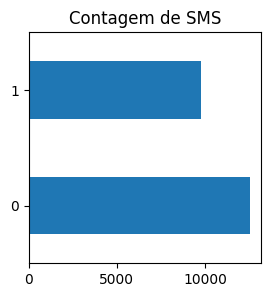

In [124]:
df_kaggle_ns.SMS_received.value_counts().plot(kind='barh', figsize=(3,3))
plt.title("Contagem de SMS");

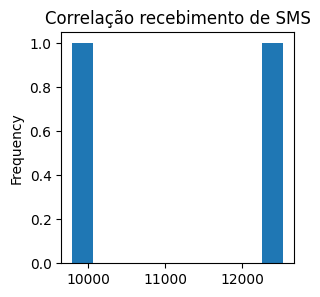

In [125]:
df_kaggle_ns.SMS_received.value_counts().plot(kind='hist', figsize=(3,3))
plt.title("Correlação recebimento de SMS");

O recebimento de SMS para lembrete e confirmação da consulta, não garante o comparecimento do paciente a consulta.

### Análise de Não Comparecimento por Dia e Mês

In [126]:
# Listando as Colunas
df_kaggle_ns.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Faixa_Idade',
       'Q_Faixa_Idade', 'Faixa_Idade_25'],
      dtype='object')

In [127]:
# Identificando a menor data
df_kaggle_ns.AppointmentDay.min()


'2016-04-29T00:00:00Z'

In [128]:
# Identificando a Maior data
df_kaggle_ns.AppointmentDay.max()

'2016-06-08T00:00:00Z'

In [129]:
# Convertendo o campo AppointmentDay para o tipo DateTime
df_kaggle_ns['AppointmentDay']=pd.to_datetime(df_kaggle_ns['AppointmentDay'])

In [130]:
# Criando o campo mes com base no campo AppointmentDay
df_kaggle_ns['mes'] = df_kaggle_ns['AppointmentDay'].dt.month

In [131]:
df_kaggle_ns['dia'] = df_kaggle_ns['AppointmentDay'].dt.day_name()

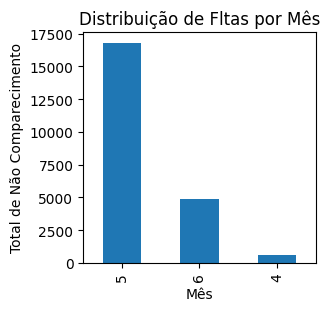

In [132]:
# Verificando o Total de Não Comparecimento por mês.
df_kaggle_ns.mes.value_counts().plot(kind='bar', figsize=(3,3))
plt.title("Distribuição de Fltas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Não Comparecimento");

Como a concentração de Não Comparecimento esta no mês de Maio, esse mês será analisando mais detalhadamente.

In [133]:
# Verificando o Total de Não Comparecimento por dia da semana.
df_kaggle_ns.query('mes == 5').dia.value_counts()

Tuesday      4336
Monday       3817
Wednesday    3507
Friday       2599
Thursday     2536
Saturday        9
Name: dia, dtype: int64

In [176]:
df_kaggle_ns.shape

(22319, 18)

In [178]:
df_kaggle_ns.query('mes == 5 & dia in ("Tuesday","Monday","Wednesday")').shape

(11660, 18)

In [179]:
(11660*100)/22319

52.24248398225727

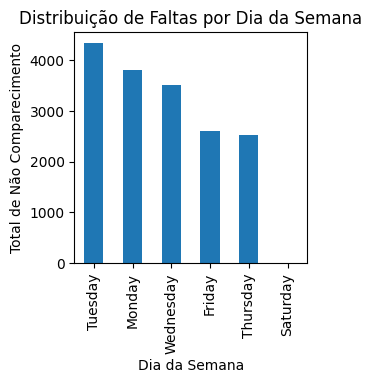

In [134]:
# Verificando o Total de Não Comparecimento por dia da semana.
df_kaggle_ns.query('mes == 5').dia.value_counts().plot(kind='bar', figsize=(3,3))
plt.title("Distribuição de Faltas por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Total de Não Comparecimento");

A concentração de não comparecimento se concentra de segunda a quarta feira, representando 70% dos não comparecimento.

### Análise por Bairro

In [135]:
# Distribuição de faltas por bairro
df_s_neighbor=df_kaggle_ns['Neighbourhood'].value_counts().reset_index()
df_s_neighbor.columns = ['NO_BAIRRO','Total']
print(df_s_neighbor)

                      NO_BAIRRO  Total
0                JARDIM CAMBURI   1465
1                   MARIA ORTIZ   1219
2                       ITARARÉ    923
3                   RESISTÊNCIA    906
4                        CENTRO    703
..                          ...    ...
75            PONTAL DE CAMBURI     12
76                  ILHA DO BOI      3
77  ILHAS OCEÂNICAS DE TRINDADE      2
78                ILHA DO FRADE      2
79                    AEROPORTO      1

[80 rows x 2 columns]


In [136]:
# Total de Faltas
TT=df_s_neighbor.Total.sum()

In [137]:
# Total dos 10 bairros com mais faltas
BB=df_s_neighbor.query("NO_BAIRRO in ('JARDIM CAMBURI','MARIA ORTIZ','ITARARÉ','RESISTÊNCIA','CENTRO','JESUS DE NAZARETH','JARDIM DA PENHA','CARATOÍRA','TABUAZEIRO','BONFIM')").Total.sum()

In [138]:
# Criando um data frame com os 10 bairros com maior incidência de falta
df_10 = df_kaggle_ns.query("Neighbourhood in ('JARDIM CAMBURI','MARIA ORTIZ','ITARARÉ','RESISTÊNCIA','CENTRO','JESUS DE NAZARETH','JARDIM DA PENHA','CARATOÍRA','TABUAZEIRO','BONFIM')").Neighbourhood.value_counts().reset_index()
df_10.columns = ['NO_BAIRRO','Total']

In [139]:
print(df_10)

           NO_BAIRRO  Total
0     JARDIM CAMBURI   1465
1        MARIA ORTIZ   1219
2            ITARARÉ    923
3        RESISTÊNCIA    906
4             CENTRO    703
5  JESUS DE NAZARETH    696
6    JARDIM DA PENHA    631
7          CARATOÍRA    591
8         TABUAZEIRO    573
9             BONFIM    550


In [140]:
# Percentual dos 10 bairros mais faltantes
(BB*100)/TT

36.99538509789865

In [141]:
# Criando um dataset com base no dataset completo, somente com as colunas a serem analisadasmmm.
df_kaggle_unq = df_kaggle_ns.loc[:,['Neighbourhood']]

In [142]:
# Retirando as duplicidades
df_kaggle_unq.drop_duplicates()

,Neighbourhood
0,GOIABEIRAS
2,NOVA PALESTINA
3,CONQUISTA
8,SÃO CRISTÓVÃO
10,GRANDE VITÓRIA
...,...
2814,UNIVERSITÁRIO
4964,AEROPORTO
10062,PONTAL DE CAMBURI
10090,ILHAS OCEÂNICAS DE TRINDADE


In [143]:
# Criando o data frame com os campos necessários para criar o mapa
df_cnes_filtrado_c = df_cnes_filtrado2.groupby('NO_BAIRRO').first()
df_cnes_filtrado_t = df_cnes_filtrado_c.loc[:,['NU_LATITUDE', 'NU_LONGITUDE']]
print(df_cnes_filtrado_t)

                    NU_LATITUDE  NU_LONGITUDE
NO_BAIRRO                                    
15 DE OUTUBRO        -19.459730    -40.677453
25 DE JULHO          -19.777951    -40.608902
ABELARDO MACHADO     -20.842000    -41.113000
ACAIACA              -20.839742    -40.731575
ACAMPAMENTO          -19.543550    -40.668325
...                         ...           ...
XURI                 -20.470777    -40.471933
ZONA RURAL           -20.914000    -41.198000
ZONA RURAL PALMITO   -18.996293    -39.869964
ZONA RURAL PIACU     -20.462400    -41.415200
ZUMBI                -20.850323    -41.132952

[1169 rows x 2 columns]


In [144]:
# Merge dos data frames para gerar o arquivo final a ser plotado.
df_lg = pd.merge(df_s_neighbor, df_cnes_filtrado_t, on='NO_BAIRRO')
df_lg.to_excel('df_lg.xlsx')
df_lg.head()

,NO_BAIRRO,Total,NU_LATITUDE,NU_LONGITUDE
0,JARDIM CAMBURI,1465,-20.258866,-40.268605
1,MARIA ORTIZ,1219,-20.257087,-40.298356
2,CENTRO,703,-20.319577,-40.335990
3,JESUS DE NAZARETH,696,-20.319773,-40.304273
4,JARDIM DA PENHA,631,-20.289254,-40.293276


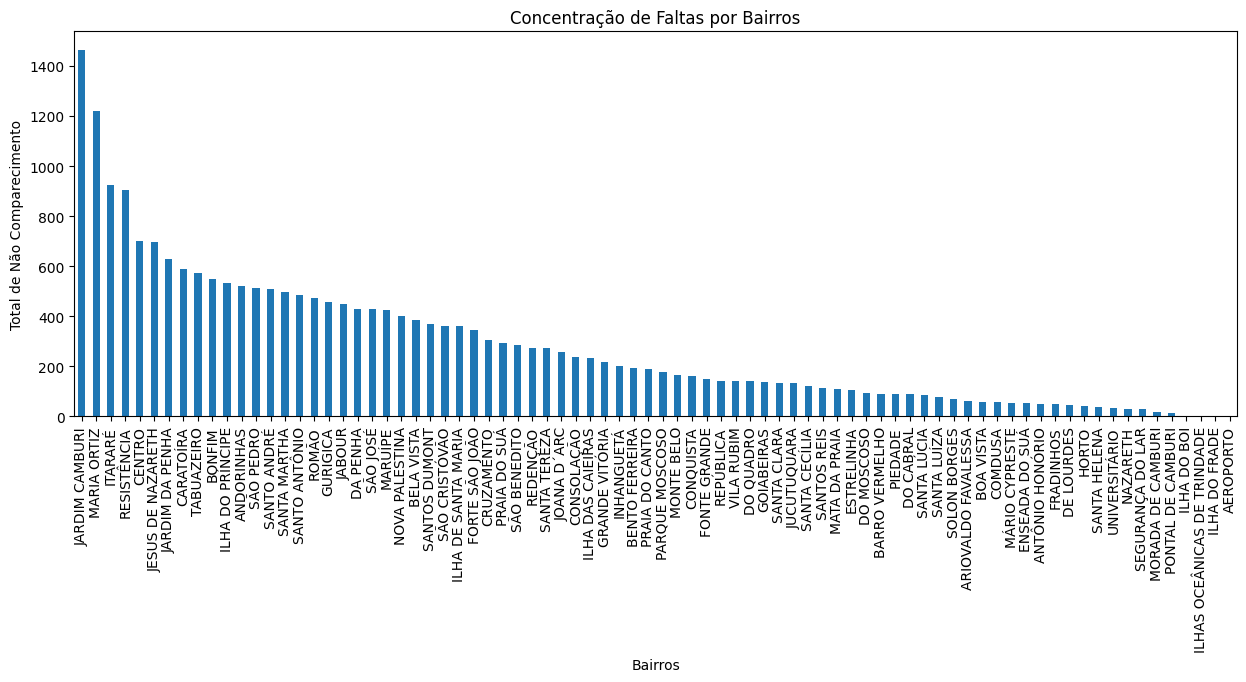

In [145]:
# Verificando o Total de Não Comparecimento por Bairro.
df_kaggle_ns.Neighbourhood.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Concentração de Faltas por Bairros")
plt.xlabel("Bairros")
plt.ylabel("Total de Não Comparecimento");

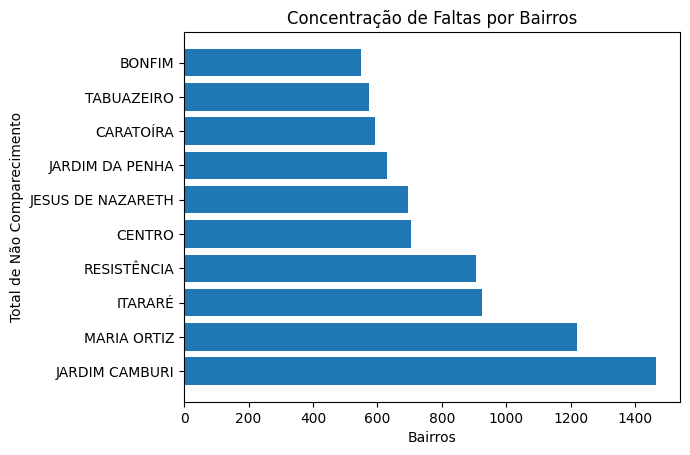

In [146]:
# Verificando o Total de Não Comparecimento pelos 10 Bairros mais faltantes.
x=df_10.NO_BAIRRO
y=df_10.Total
plt.barh(x,y)
plt.title("Concentração de Faltas por Bairros")
plt.xlabel("Bairros")
plt.ylabel("Total de Não Comparecimento");

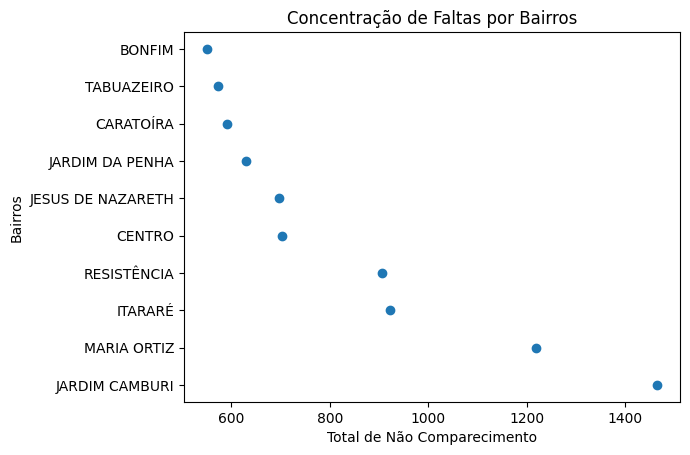

In [147]:
# Verificando o Total de Não Comparecimento pelos 10 Bairros mais faltantes.
y=df_10.NO_BAIRRO
x=df_10.Total
plt.scatter(x,y)
plt.title("Concentração de Faltas por Bairros")
plt.xlabel("Total de Não Comparecimento")
plt.ylabel("Bairros");

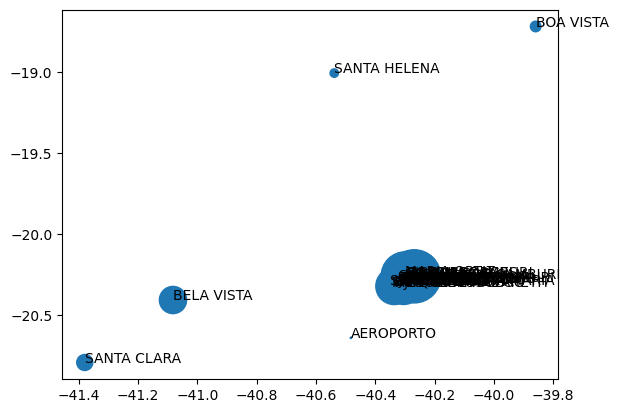

In [148]:
# Criando o gráfico de bolhas com os dados de Bairro, Latitude, Logitude e Total
latitudes = df_lg.NU_LATITUDE
longitudes = df_lg.NU_LONGITUDE
nomes_cidades = df_lg.NO_BAIRRO
tamanhos = df_lg.Total

# Cria o mapa gráfico
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes, s=tamanhos)

# Adiciona os nomes das cidades
for i, nome in enumerate(nomes_cidades):
    ax.annotate(nome, (longitudes[i], latitudes[i]))

# Exibe o mapa gráfico
plt.show()

Não consegui fazer corretamente o gráfico no python corretamente, de forma a mostrar o mapa e as concentrações de faltantes por bairro, então gerei um csv com os dados do dataset e gerei o gráfico no Power BI, segue a baixo a imagem capturada do Power BI.

In [149]:
# Imagem criado no Power Bi.
url = 'https://raw.githubusercontent.com/VicenteLigiero/DadosConsultas/main/Faltas%20por%20bairros.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()

Dos 90 bairros, 10 concentram quase 37% dos não comparecimento as consultas, indicando necessidade de atuação maior nesses locais, com o objetivo de diminuir o não comparecimento.

## Conclusão



Durante a análise exploratória, observa-se no comportamento do não comparecimento, uma concentração na faixa etária menor de 39 anos, representando quase 60%, detalhando esse range de idade, verifica-se que pessoas de 0 a 16 anos representam 28,4% dos não comparecimento, por se tratar de menores de idade, os mesmos dependem dos responsáveis para comparecerem as consultas, já a faixa etária de 20 a 39 anos, representam 29,9%.

Pessoas do sexo feminino tem uma incidência de falta demais de 65%, enquanto que do sexo masculino quase 35%.

Já o recebimento de mensagens de confirmação de consulta, apesar de correlação ligeiramente positiva, não impacta significativamente no comparecimento a consulta, sendo necessário uso de outros recursos mais eficazes, como por exemplo uma IA que se comunique via WhatsApp, interagindo com o paciente/responsável.

O início da semana é o que tem a maior incidência de falta quase 53%, havendo a necessidade de maior atuação nos dias que precedem esse período, por ser fim de semana, justifica-se o uso da IA citada acima para fazer essa interação. Os 10 bairros com maior não comparecimento, representa quase 37% do total de faltas, sendo eles os indicados para iniciar uma campanha para redução dos não comparecimentos, podendo para uma prova de conceito, escolher um deles.

A presença de doenças pré existente não se comprovou como um fator de não comparecimento, isso indica que após adquirir a doença, o paciente tende a ser mais assíduo as consultas, isso indica a necessidade de campanha de prevenção, evitando assim tratamentos mais complexos e caros, que gera custos maiores, tanto para o Governo quanto para o paciente, a prevenção é importante em diversos aspectos, do ponto de vista de gestão, diminuí a superlotação da emergências e o consumo de remédio das farmácias públicas.

Para uma análise mais profunda, sugere se o uso de machine learning, para prever os pacientes com maior probabilidade de não comparecimento e dessa forma, traçar estratégias de comunicação com esses pacientes e mitigação dos risco de faltas, com uma lsita de paciente para encaixes, dessa forma otimizando a agenda do profissional de saúde e atendendo de forma mais efciente os pacientes.